In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
import dask.array as da
import dask.dataframe as dd
import dask


In [2]:
file = '../../data/pair3.mat'

In [3]:
with h5py.File(file, 'r') as f:
    trace = f['s_traces']
    trace_T = trace[:].T  # Transpose the dataset
    trace_T_subset = trace_T[:100, :]  
    s_traces = da.from_array(trace_T, chunks=(10000, trace_T_subset.shape[1]))  

s_traces

dask.array<array, shape=(76680, 6000), dtype=[('real', '<f8'), ('imag', '<f8')], chunksize=(10000, 6000), chunktype=numpy.ndarray>

In [6]:
s_traces.dtype

dtype([('real', '<f8'), ('imag', '<f8')])

In [4]:
s_traces_real = s_traces['real']  
s_traces_imag = s_traces['imag']
df_real = dd.from_dask_array(s_traces_real, columns=[i for i in range(s_traces_real.shape[1])])
df_i = dd.from_dask_array(s_traces_imag, columns= [i for i in range(s_traces_imag.shape[1])])
df_real.head()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.000266,0.000339,0.000397,0.000432,0.000439,0.000414,0.000355,0.000264,0.000147,0.000013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.000195,-0.000104,-0.000008,0.000088,0.000182,0.000268,0.000341,0.000397,0.000430,0.000436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000330,0.000295,0.000229,0.000140,0.000036,-0.000075,-0.000181,-0.000274,-0.000345,-0.000389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000382,0.000312,0.000213,0.000092,-0.000038,-0.000163,-0.000269,-0.000344,-0.000378,-0.000367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000020,0.000073,0.000113,0.000137,0.000142,0.000130,0.000104,0.000065,0.000019,-0.000030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_i.head()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,-0.000281,-0.000216,-0.000130,-0.000026,0.000088,0.000206,0.000317,0.000410,0.000476,0.000508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.000341,-0.000378,-0.000393,-0.000386,-0.000357,-0.000306,-0.000235,-0.000146,-0.000041,0.000072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000110,0.000208,0.000291,0.000352,0.000385,0.000385,0.000352,0.000290,0.000205,0.000104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000202,0.000305,0.000383,0.000427,0.000431,0.000394,0.000318,0.000211,0.000088,-0.000038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.000152,-0.000128,-0.000088,-0.000039,0.000013,0.000063,0.000106,0.000137,0.000155,0.000157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plotting the first row

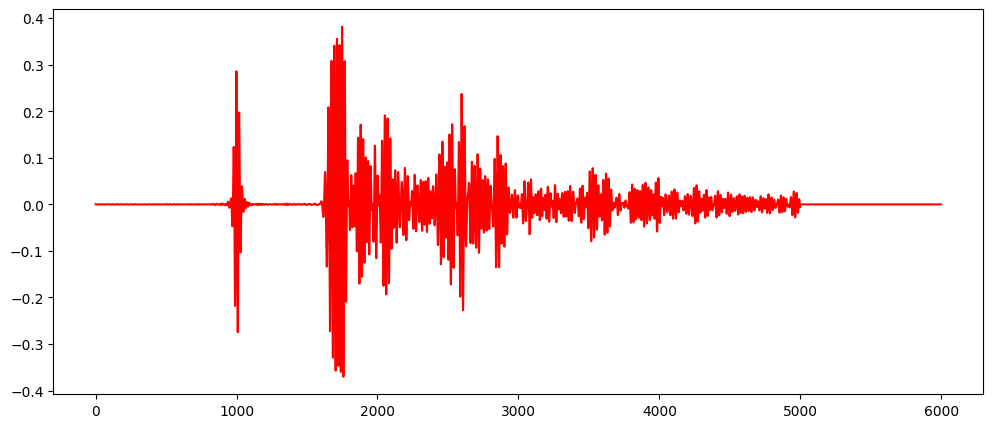

In [9]:
y_row = df_real.loc[0,:].compute()
y_values = y_row.values.flatten() 
x_values = range(y_values.shape[0])

plt.figure(figsize=(12, 5))
plt.plot(x_values, y_values, label="First Row", color= 'red')
plt.show()

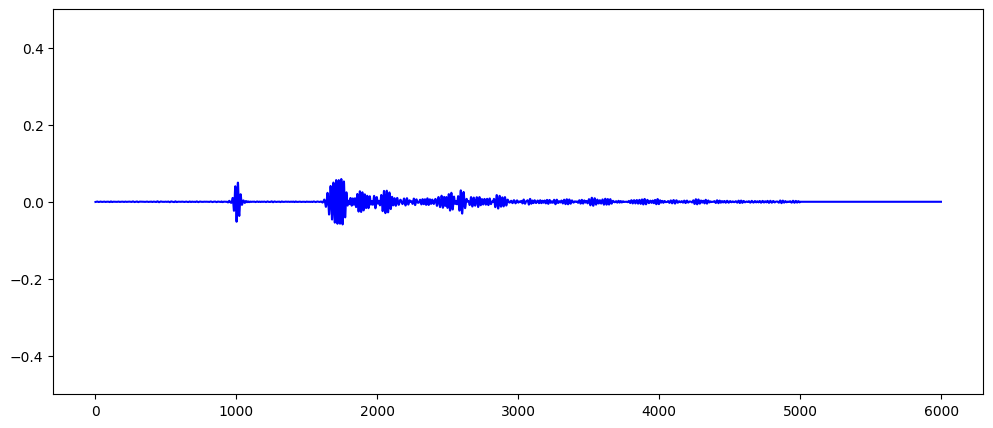

In [10]:
row_1 = df_real.loc[0,:].compute()
row_2 = df_real.loc[1, :].compute()

subtraction_1 = row_2.values.flatten() - row_1.values.flatten()

x_values = range(subtraction_1.shape[0])

plt.figure(figsize=(12, 5))
plt.plot(x_values, subtraction_1, color='blue')
plt.ylim(-0.5, 0.5)
plt.show()

Function to plot a row

In [11]:
def plot_dask(df, date_df, row_label):

    y_row = df.loc[row_label, :].compute()
    y_values = y_row.values.flatten() 
    x_values = range(y_values.shape[0])

    plt.figure(figsize=(12, 5))
    plt.plot(x_values, y_values, color= 'red')
    plt.title(f'Row {row_label} at time {date_df.loc[row_label, 'date']}')
    plt.show()

Function to subtract 2 consecutive rows

In [12]:
def subtract_wave(df, date_df, row_index):

    prev_i = max(0, row_index - 1)

    row_1, row_2 = dask.compute(df.loc[prev_i, :], df.loc[row_index, :])

    subtraction_1 = row_2.values.flatten() - row_1.values.flatten()

    x_values = range(subtraction_1.shape[0])

    plt.figure(figsize=(12, 5))
    plt.plot(x_values, subtraction_1, color='blue')
    plt.title(f'Difference between time {date_df.loc[row_index -1, 'date']} and {date_df.loc[row_index, 'date']}')
    plt.ylim(-0.5, 0.5)
    plt.show()

In [5]:
def get_index(date_df, time_list):
    index = date_df[date_df['date'].isin(time_list)].index.to_list()
    return index

In [14]:
def plot_and_subtract(df, df_date, time):
    index = get_index(df_date, time)

    for i in index:
        plot_dask(df, df_date, i)

    for i in index:
        subtract_wave(df, df_date, i)

## Datetime Preprocessing

In [6]:
with h5py.File(file, "r") as mat_file:
    s_dates = mat_file["s_dates"][:]  

s_dates = s_dates.flatten()  # Convert from (1, 76680) -> (76680,)

In [16]:
s_dates

array([734872.39444444, 734872.40902778, 734872.43541667, ...,
       738315.42361111, 738315.42430556, 738315.42569444])

In [7]:
from datetime import timedelta, datetime

def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    python_date = datetime.fromordinal(int(datenum)) \
           + timedelta(days=days) \
           - timedelta(days=366)
    
    if python_date.second > 30:
        python_date = python_date + timedelta(minutes=1)  
        python_date = python_date.replace(second=0)  

    return python_date.strftime("%Y-%m-%d-%H-%M")

In [8]:
s_dates_to_python = np.array([datenum_to_datetime(d) for d in s_dates])
s_dates_to_python

array(['2012-01-04-09-28', '2012-01-04-09-49', '2012-01-04-10-27', ...,
       '2021-06-08-10-10', '2021-06-08-10-11', '2021-06-08-10-13'],
      dtype='<U16')

In [9]:
s_dates_df = pd.DataFrame(s_dates_to_python, columns= ['date'])
s_dates_df

,date
0,2012-01-04-09-28
1,2012-01-04-09-49
2,2012-01-04-10-27
3,2012-01-04-11-05
4,2012-01-04-11-13
...,...
76675,2021-06-08-10-06
76676,2021-06-08-10-08
76677,2021-06-08-10-10
76678,2021-06-08-10-11


In [20]:
s_dates_df.duplicated().sum()

0

## Data Visualization 

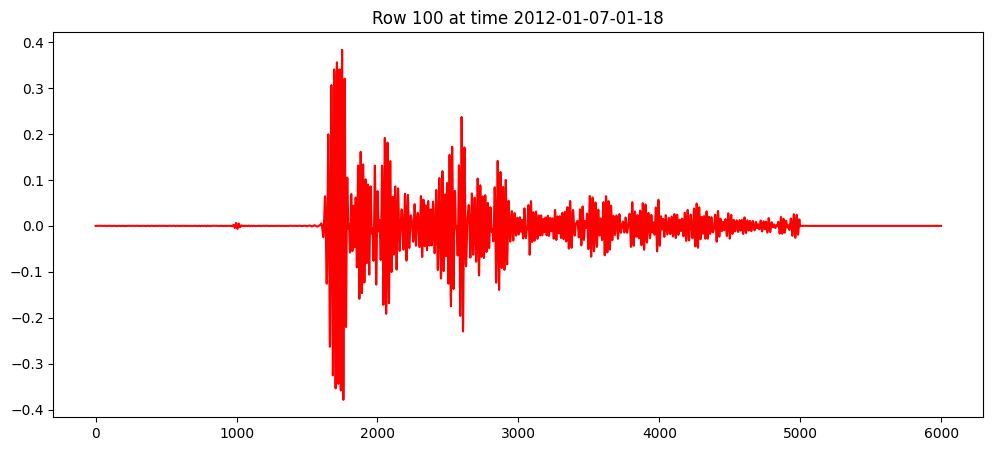

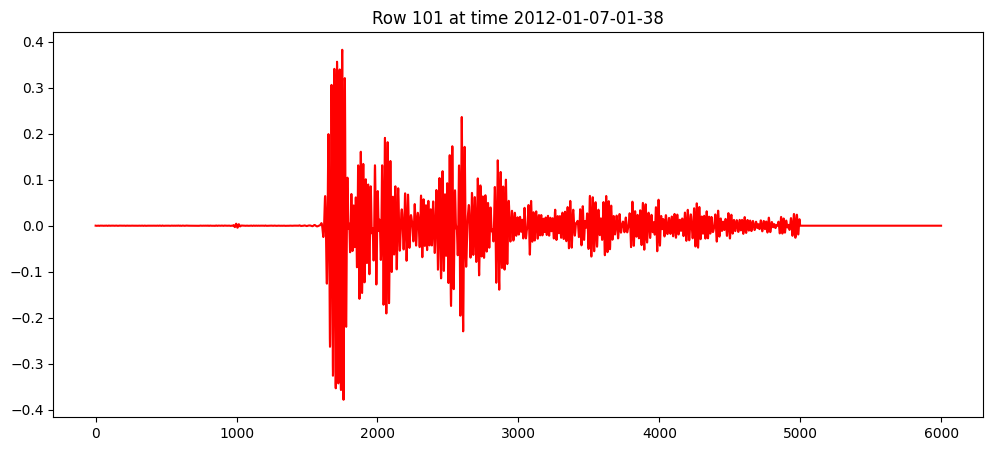

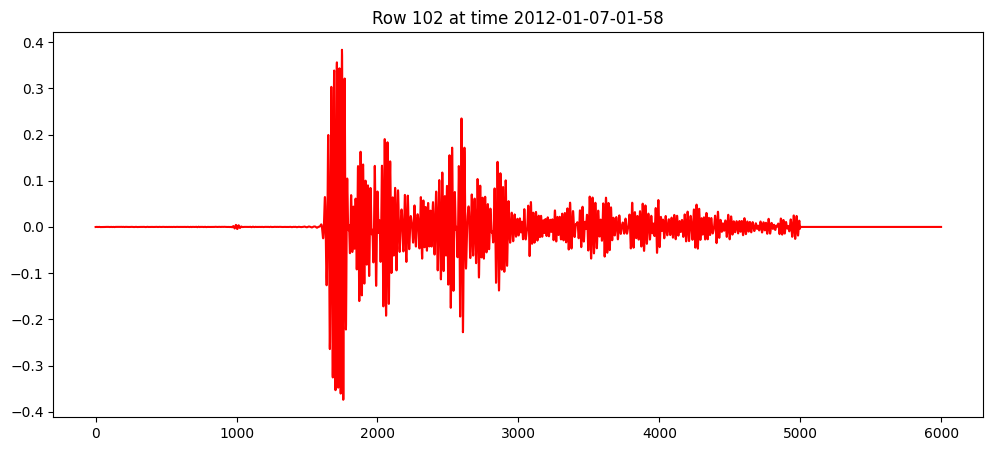

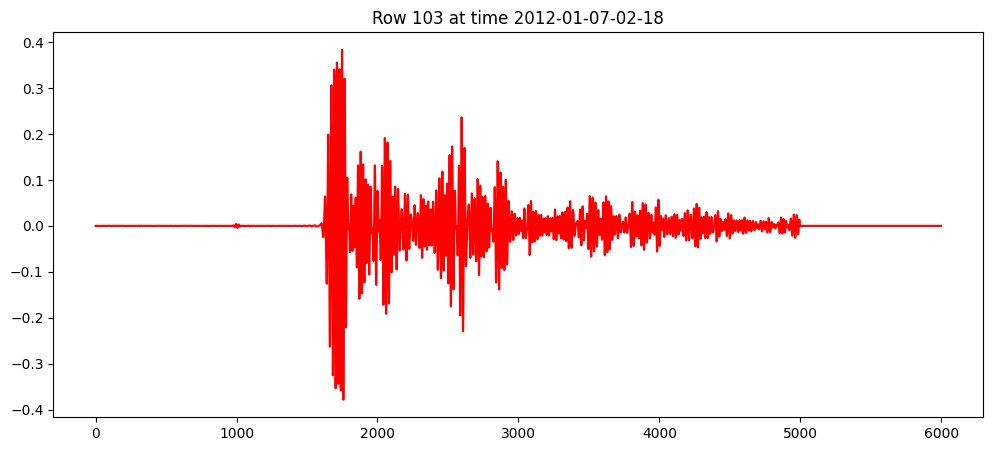

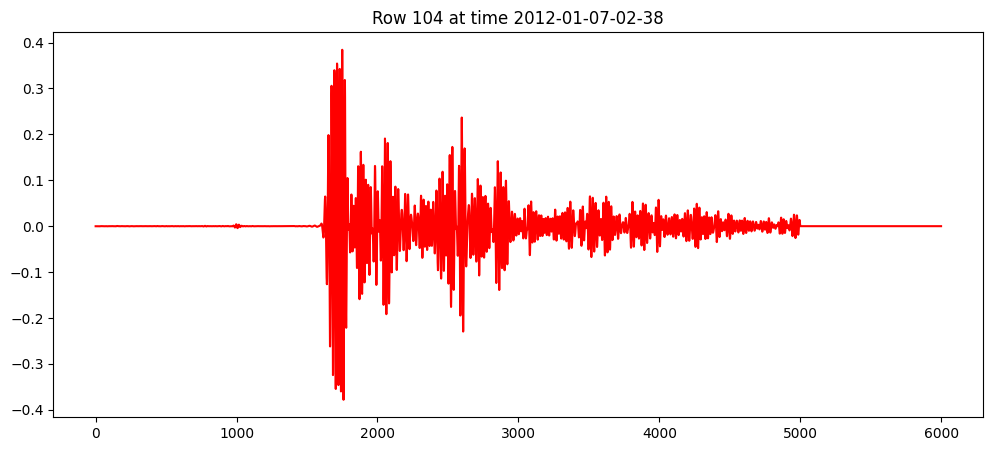

In [21]:
for i in range(100, 105):
    plot_dask(df_real, s_dates_df, i)

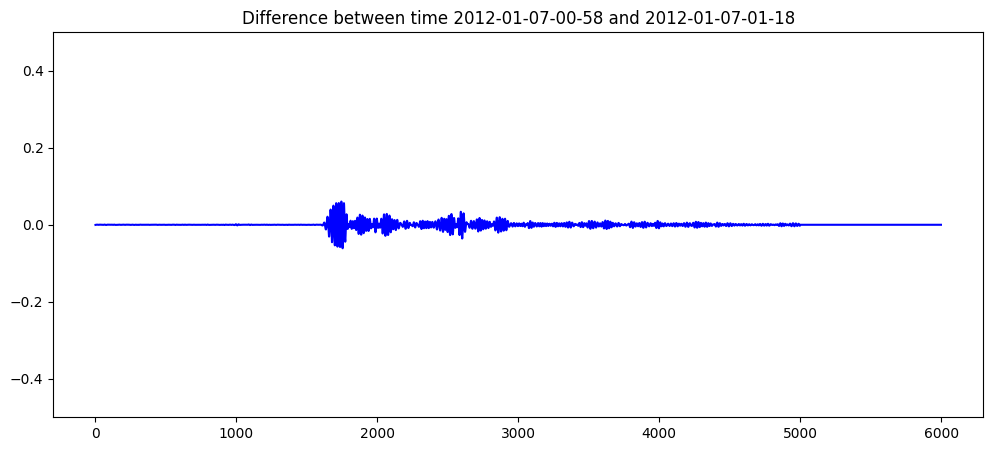

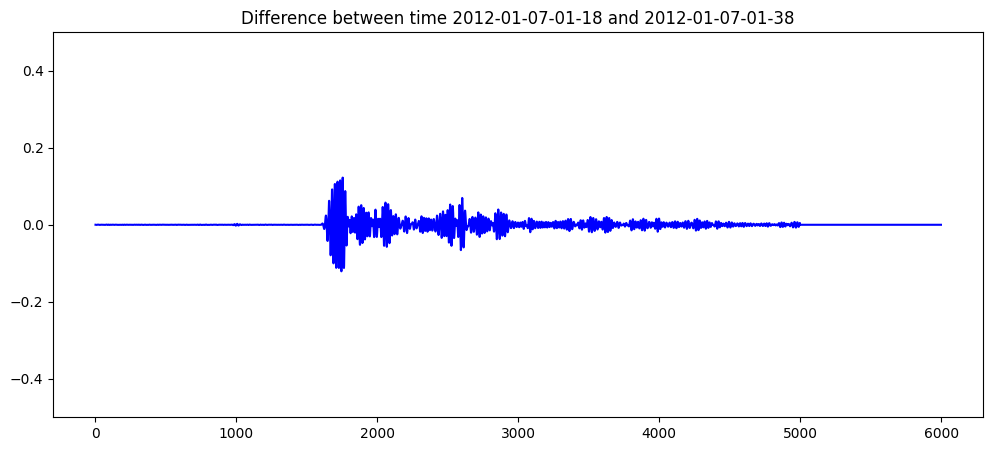

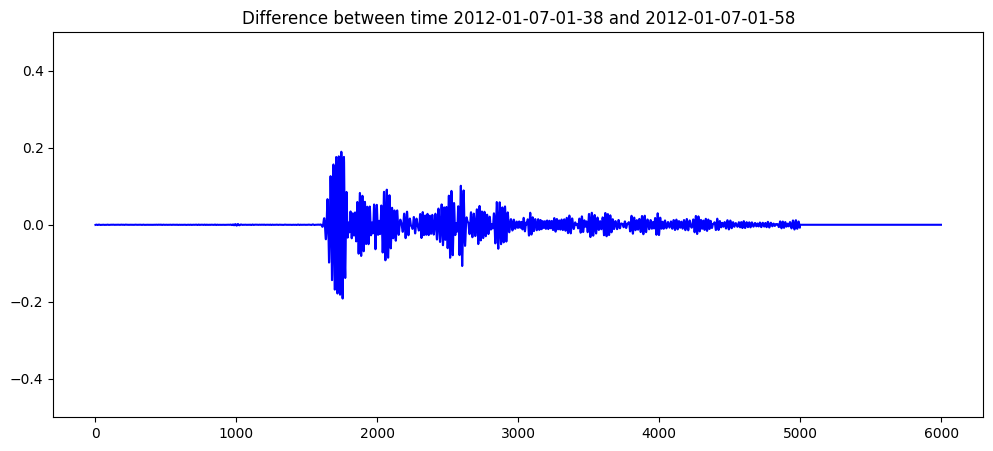

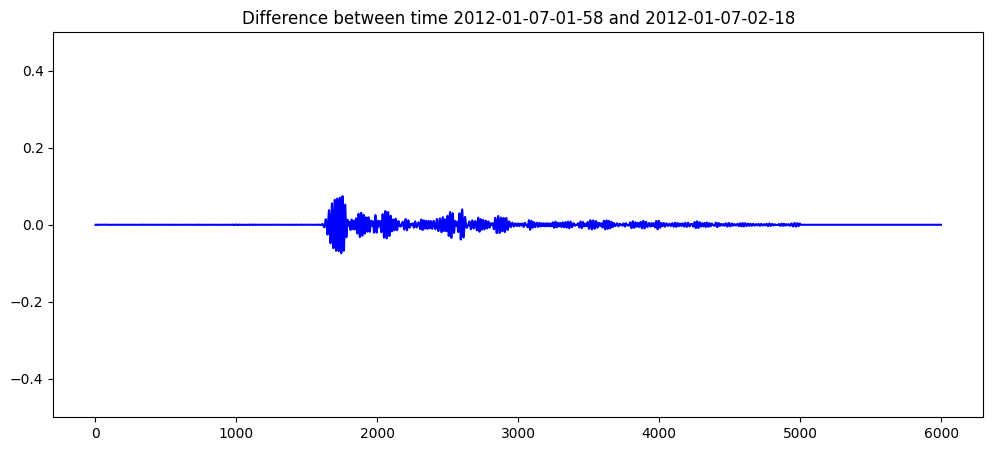

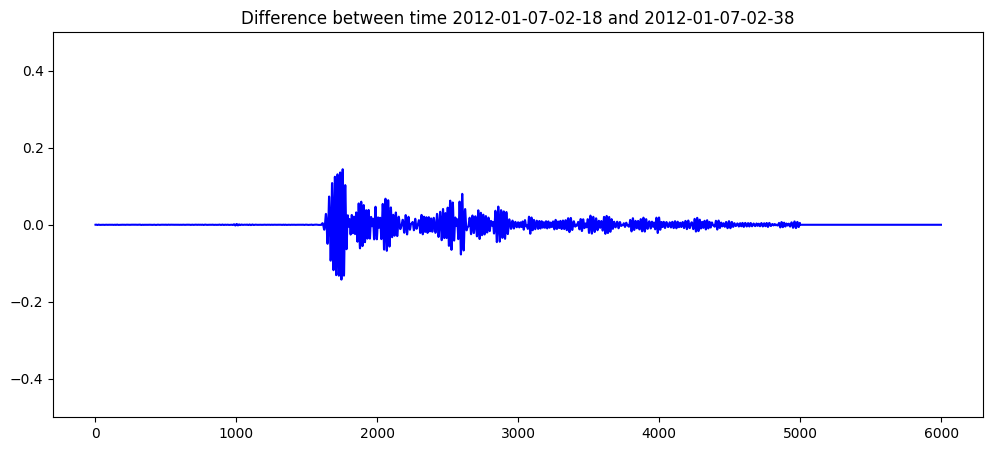

In [22]:
for i in range(100, 105):
    subtract_wave(df_real, s_dates_df, i)

## 1. Plotting Undamaged Data

In [23]:
time_1 = ['2021-06-08-09-05',
          '2021-06-08-09-03',
          '2021-06-08-09-02',
          '2021-06-08-09-00']

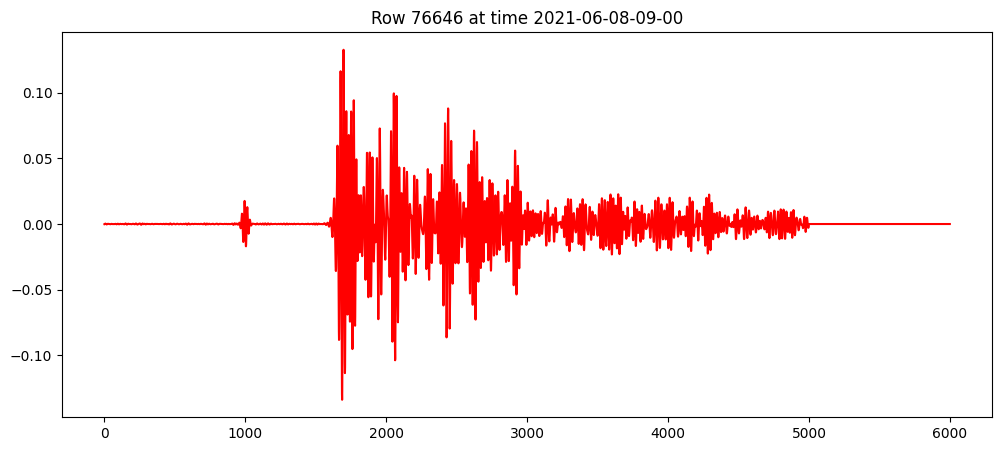

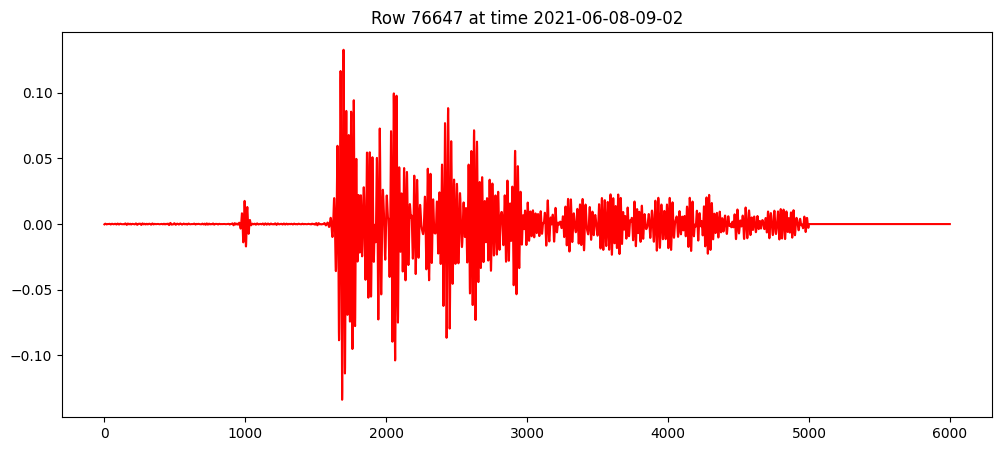

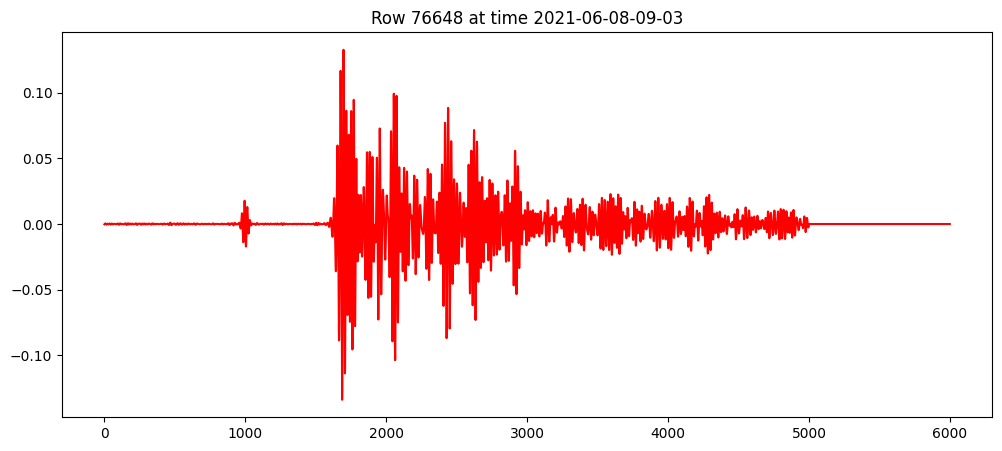

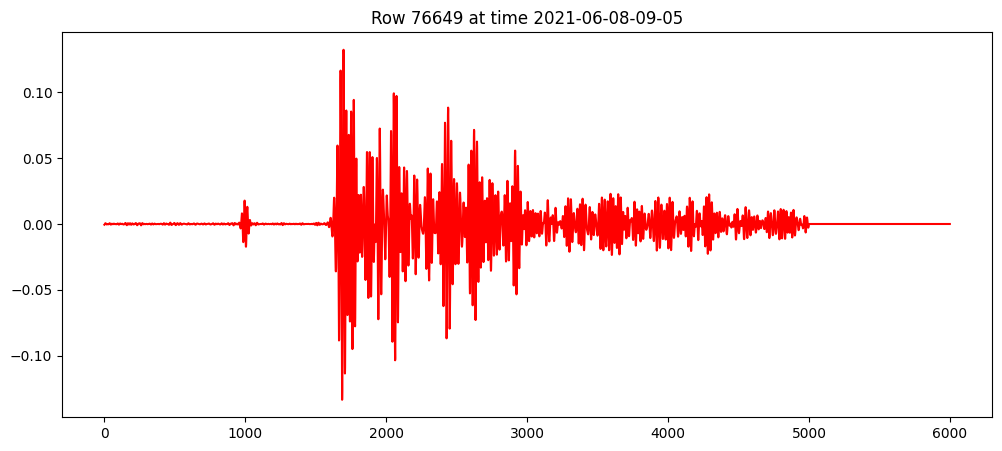

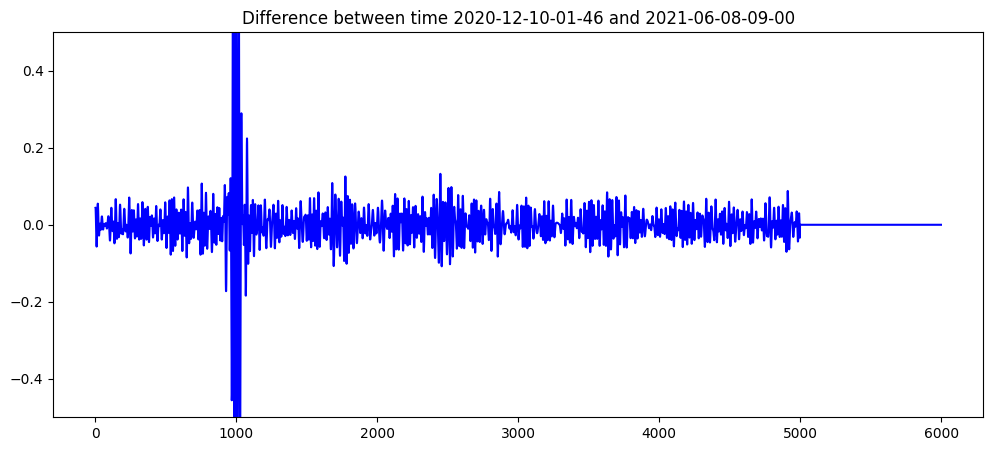

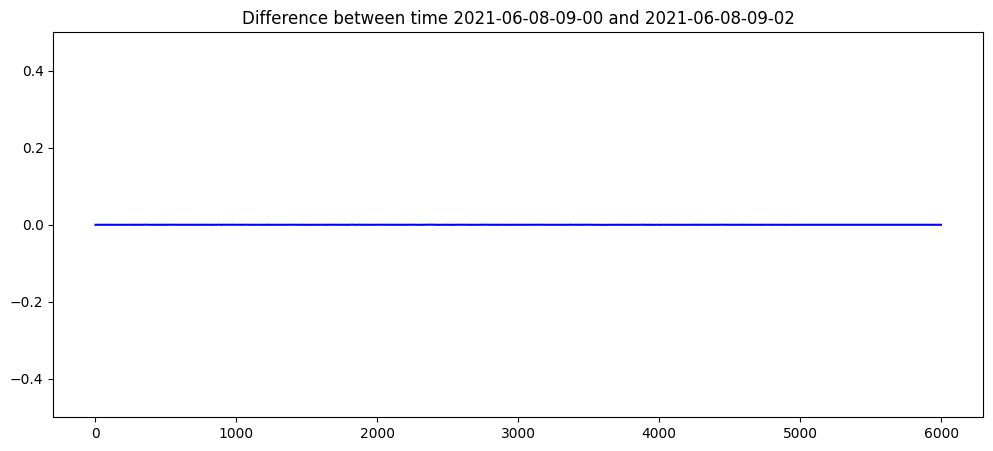

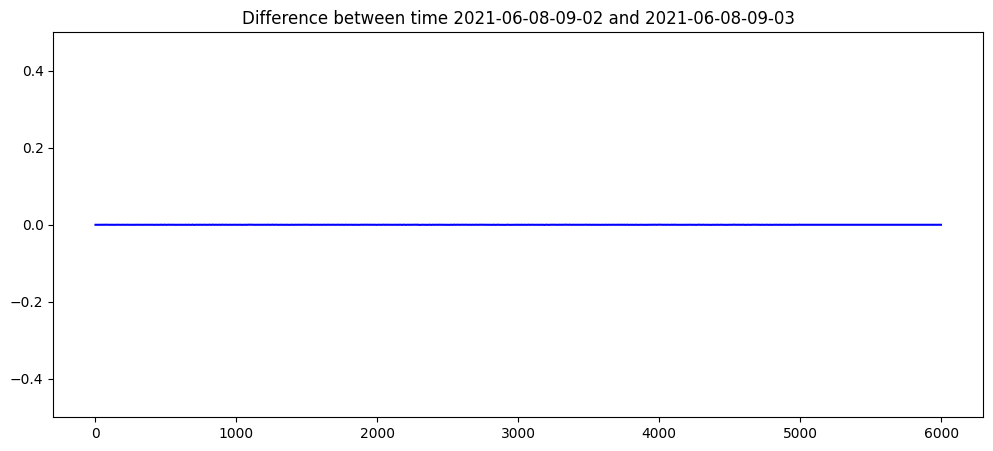

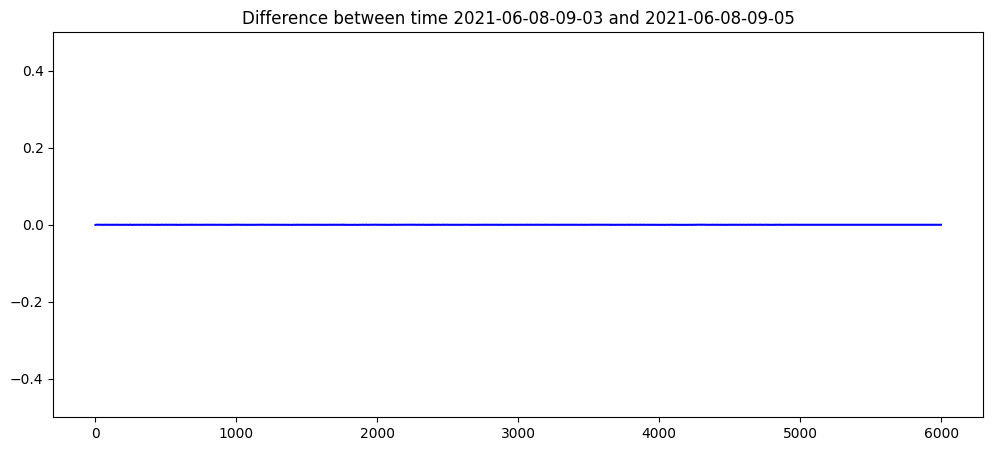

In [24]:
plot_and_subtract(df_real, s_dates_df, time_1)

## 2. Plotting Damaged Data no.1

### part depth (2/3?) 3.5mm

In [25]:
time_2 = ['2021-06-08-09-15',
          '2021-06-08-09-16',
          '2021-06-08-09-18',
          '2021-06-08-09-19',
          '2021-06-08-09-21']

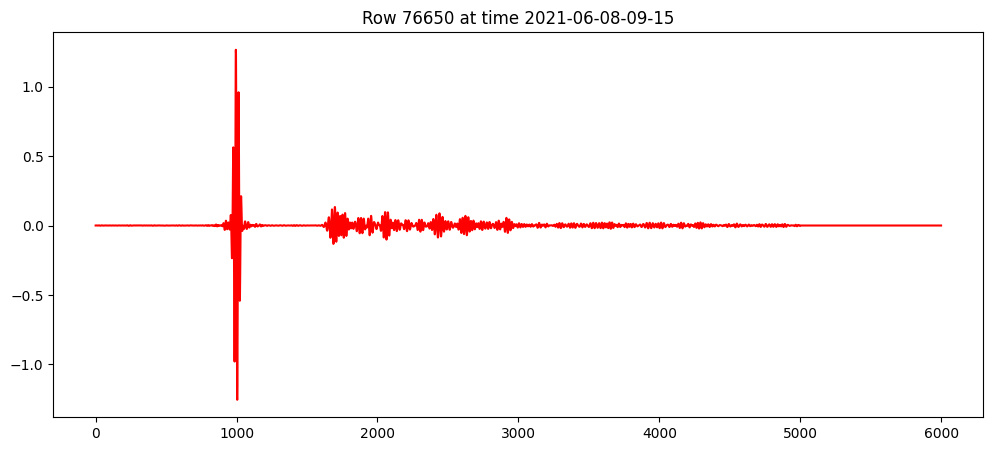

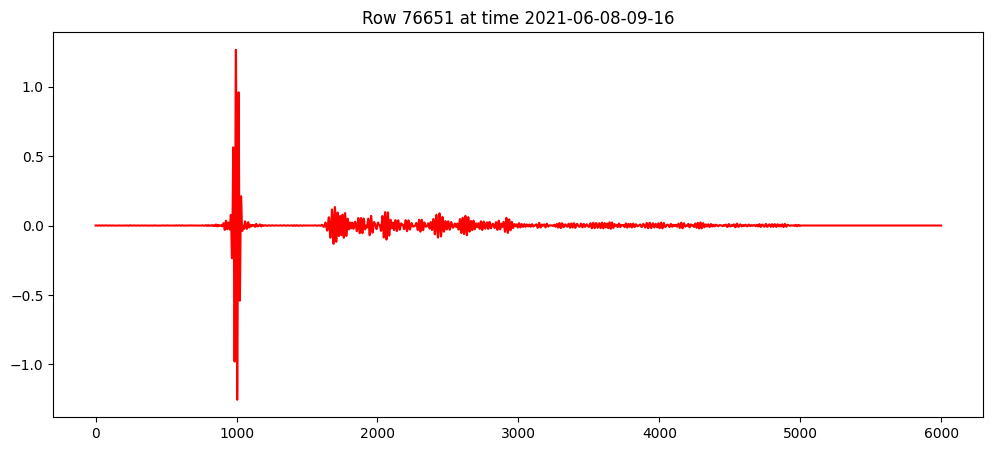

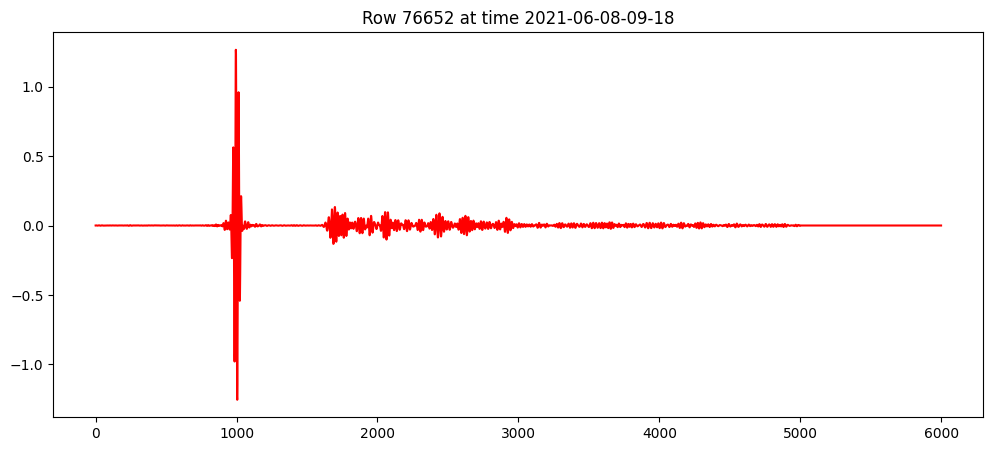

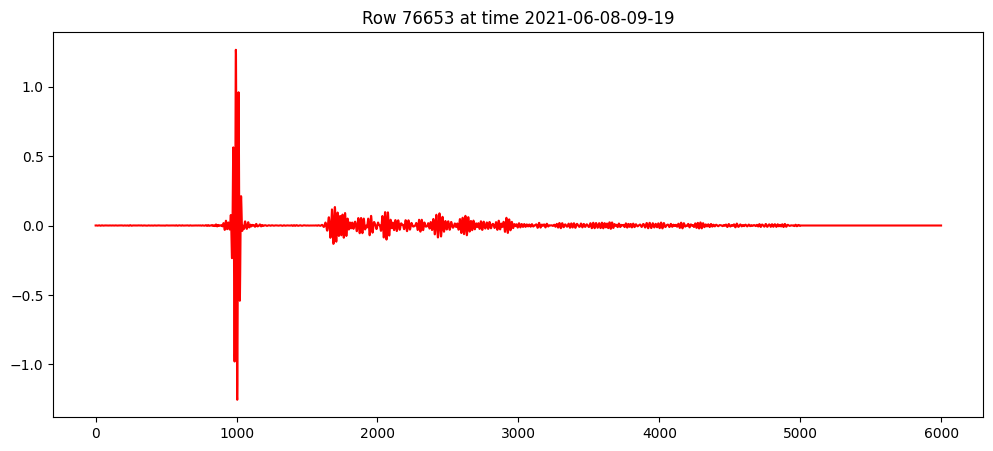

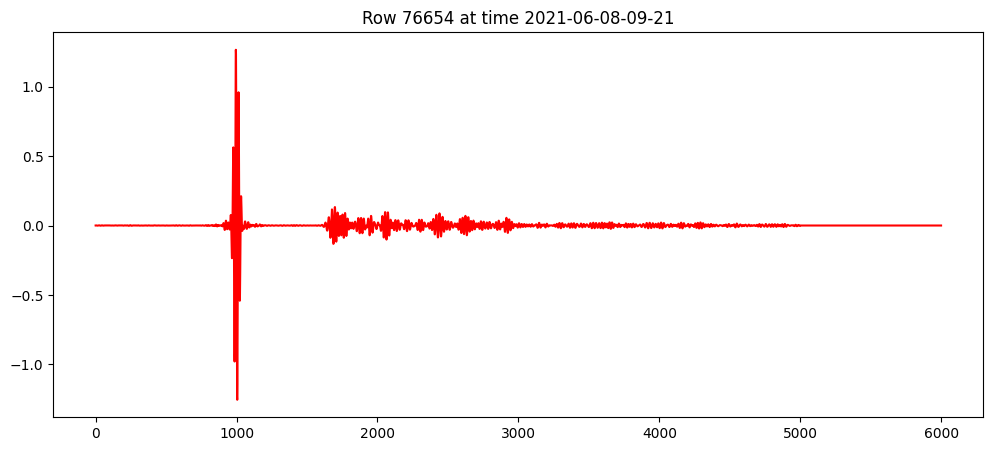

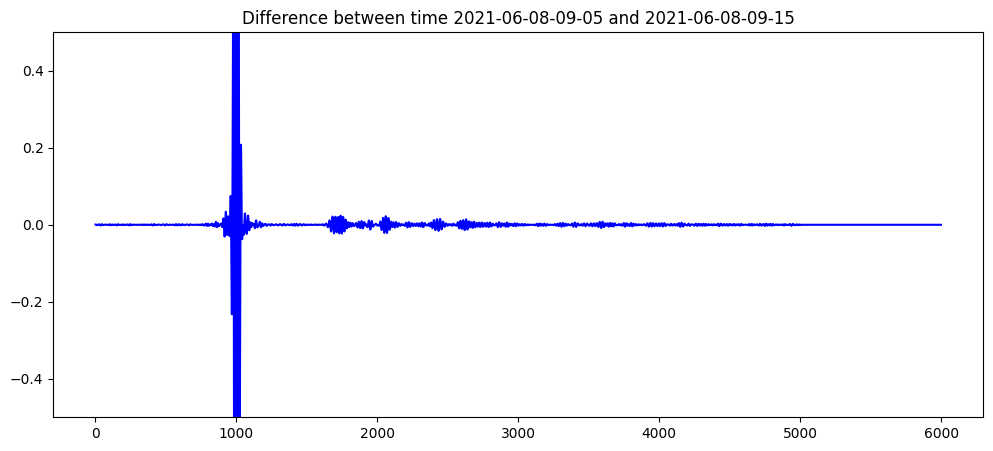

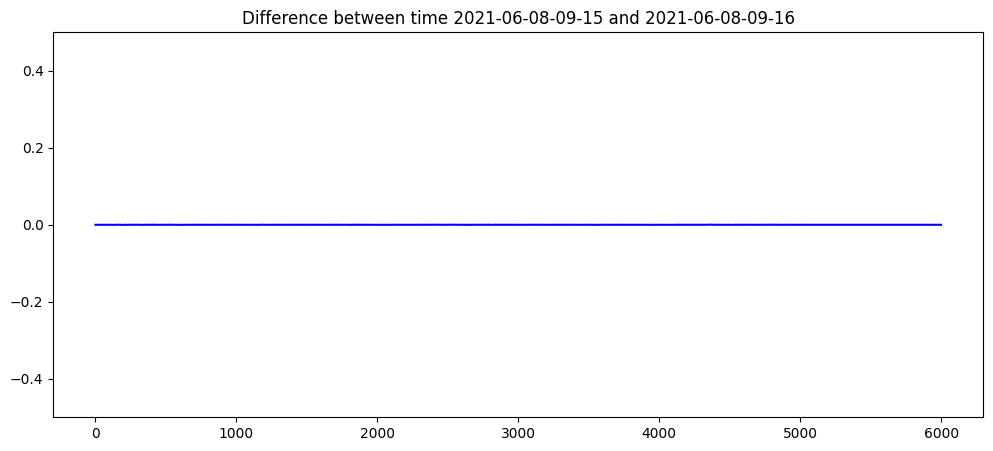

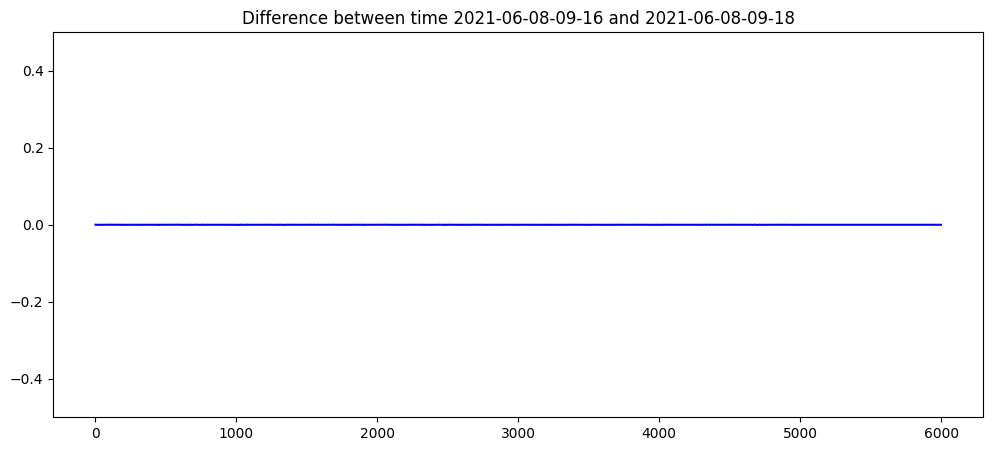

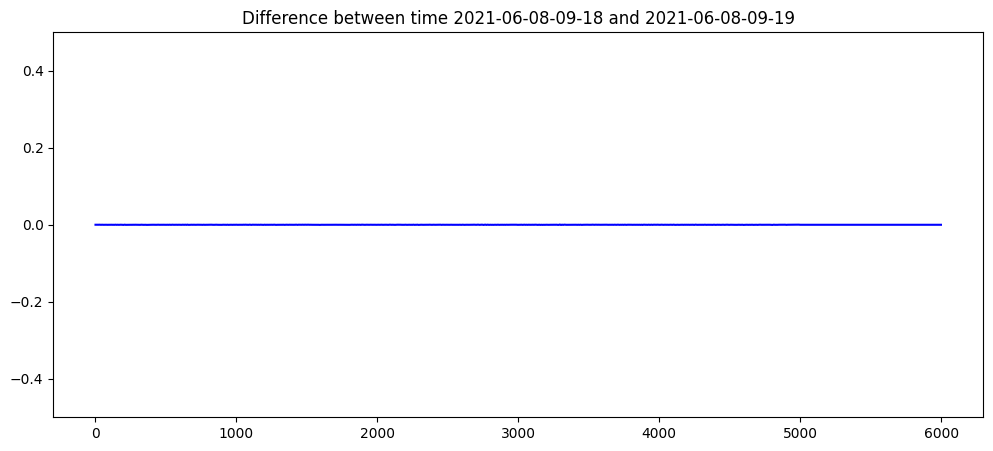

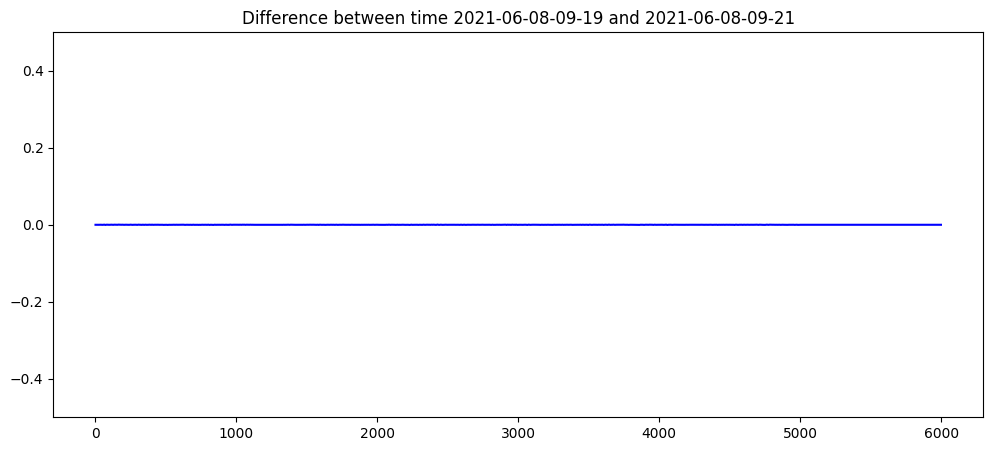

In [26]:
plot_and_subtract(df_real, s_dates_df, time_2)

## 3. Plotting Damaged Data no.2

### 3.5mm through hole

In [27]:
time_3 = ['2021-06-08-09-24',
          '2021-06-08-09-25',
          '2021-06-08-09-27',
          '2021-06-08-09-28',
          '2021-06-08-09-30']

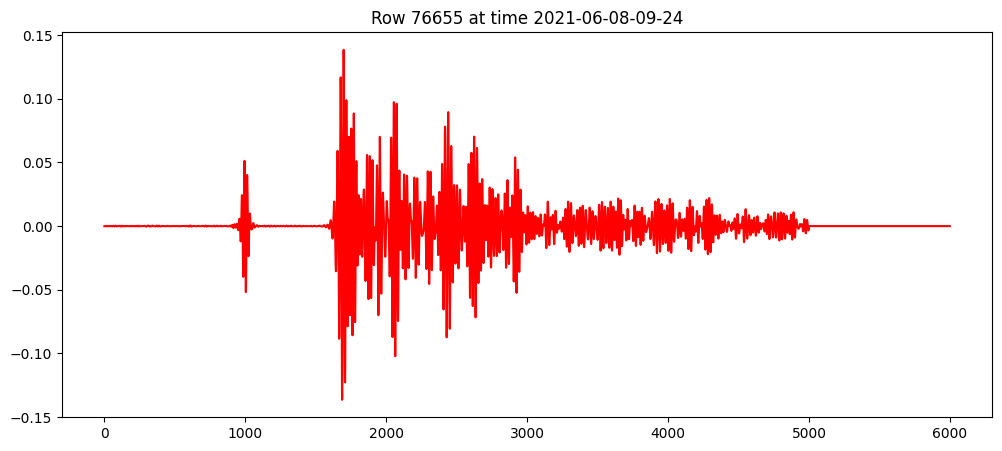

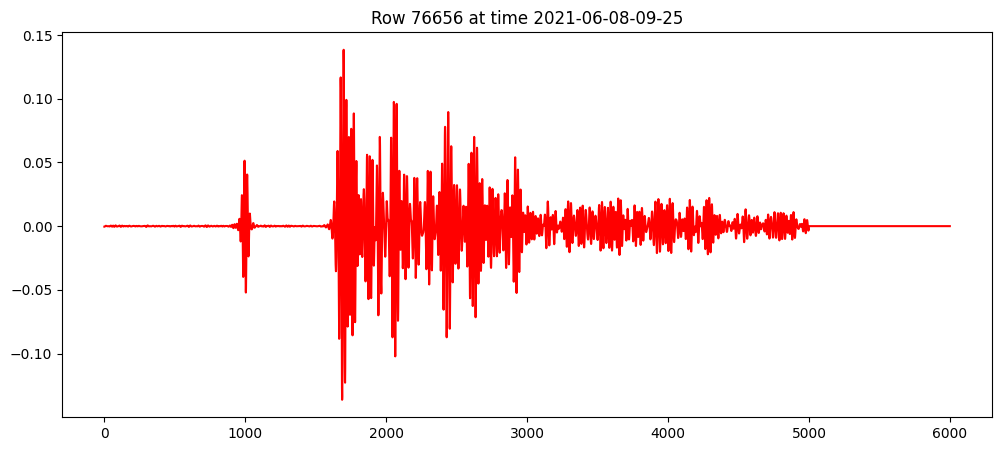

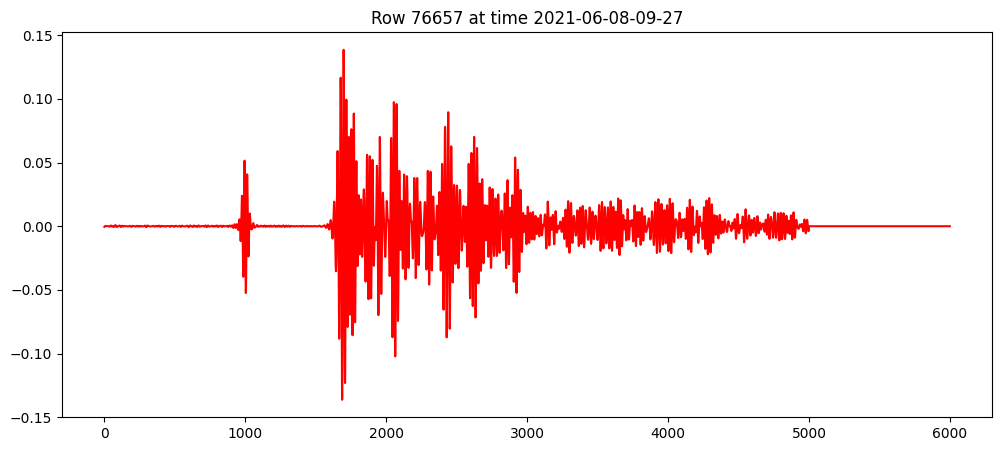

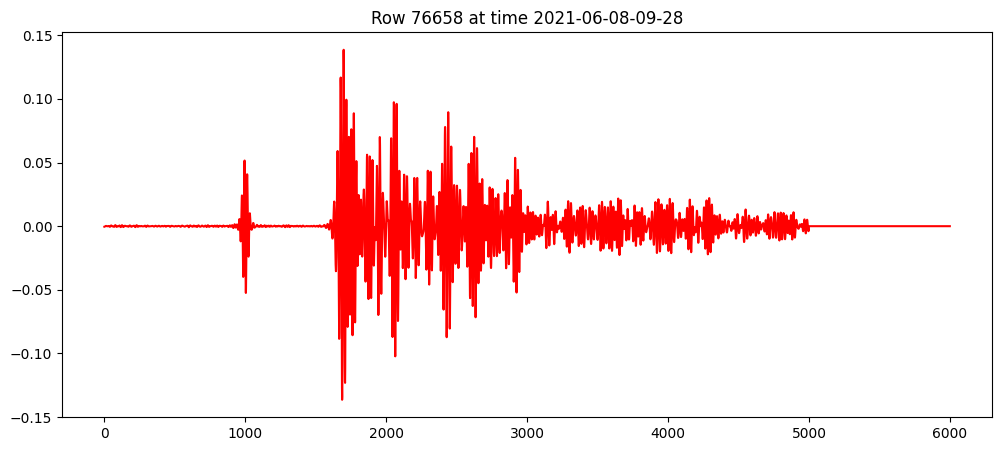

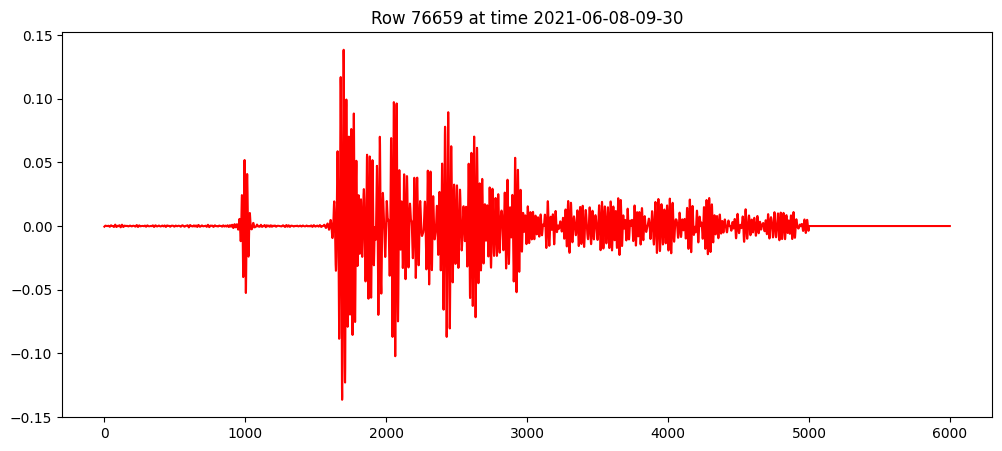

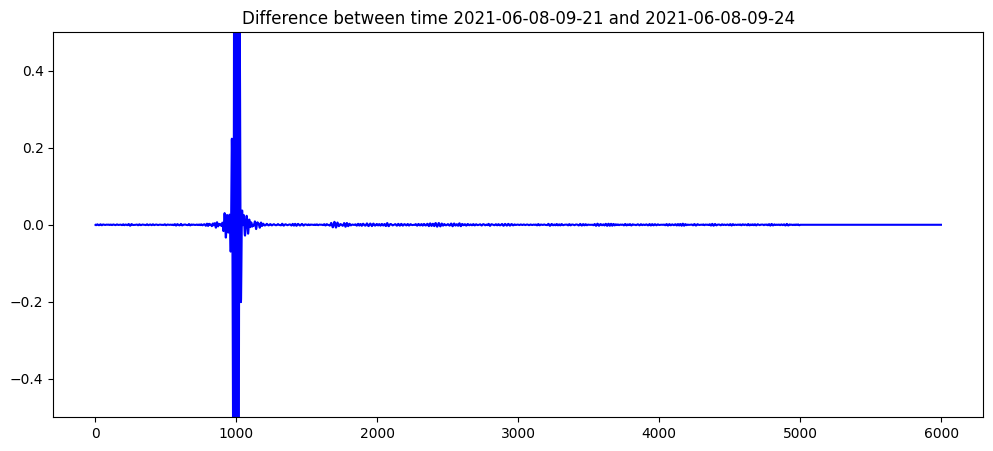

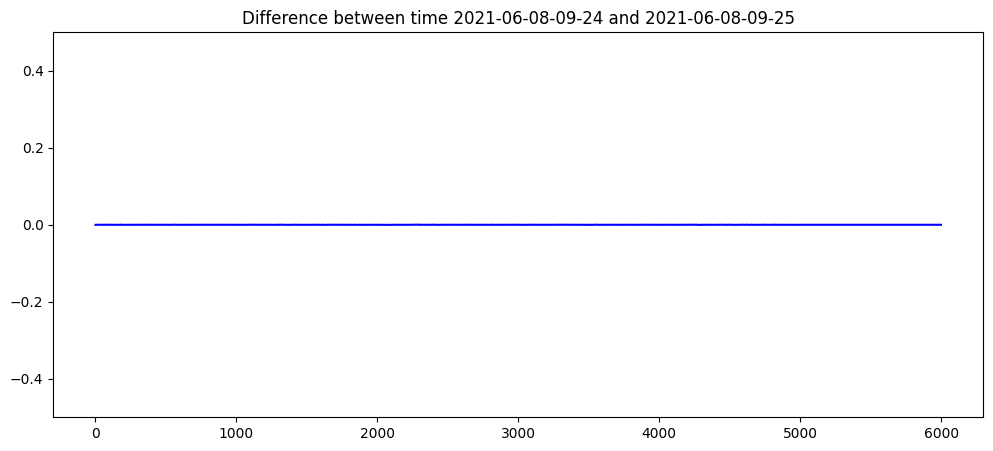

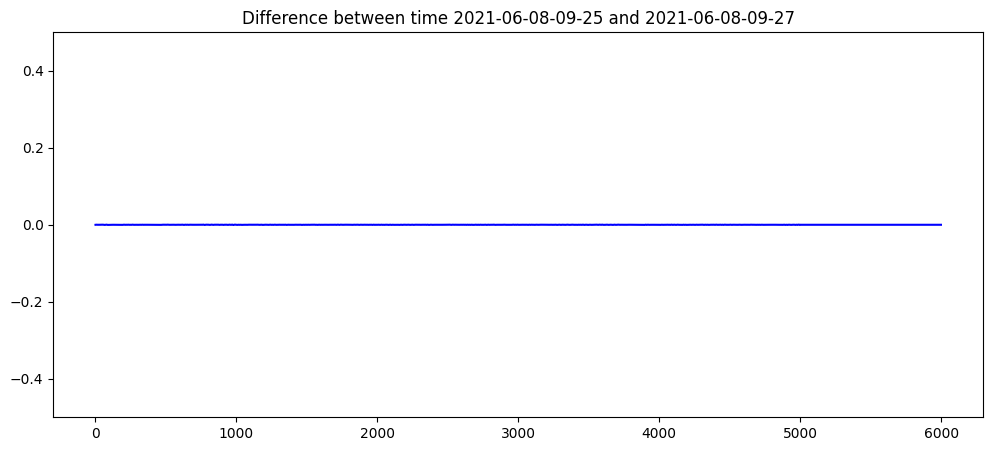

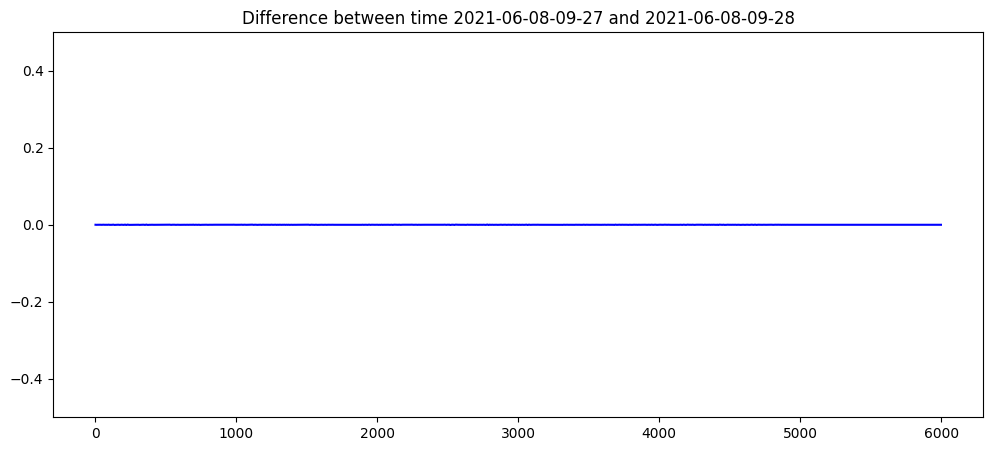

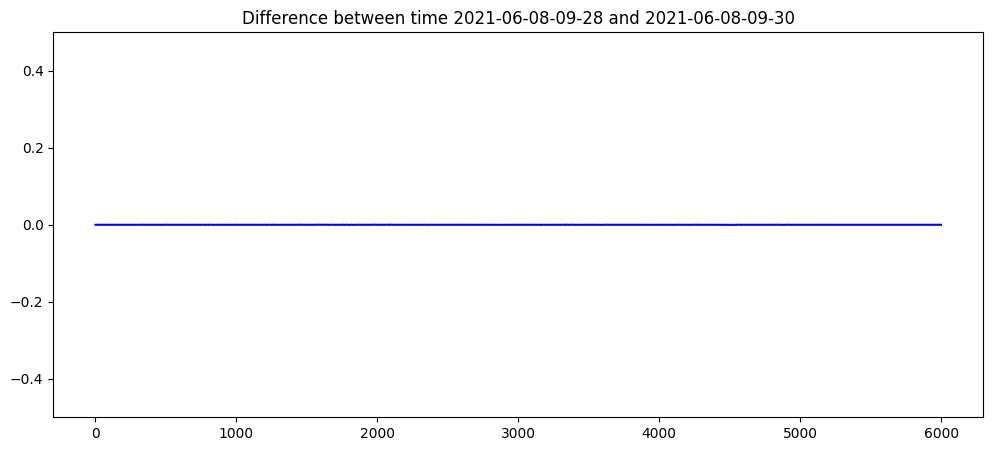

In [28]:
plot_and_subtract(df_real, s_dates_df, time_3)

## 4. Plotting Damaged Data no.3

### 7mm through hole

In [29]:
time_4 = ['2021-06-08-09-52',
          '2021-06-08-09-54',
          '2021-06-08-09-55',
          '2021-06-08-09-57',
          '2021-06-08-09-59']

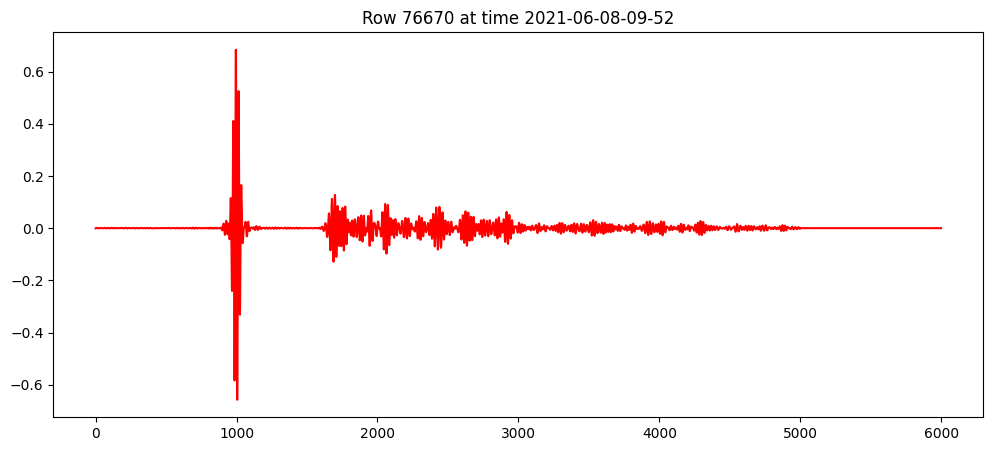

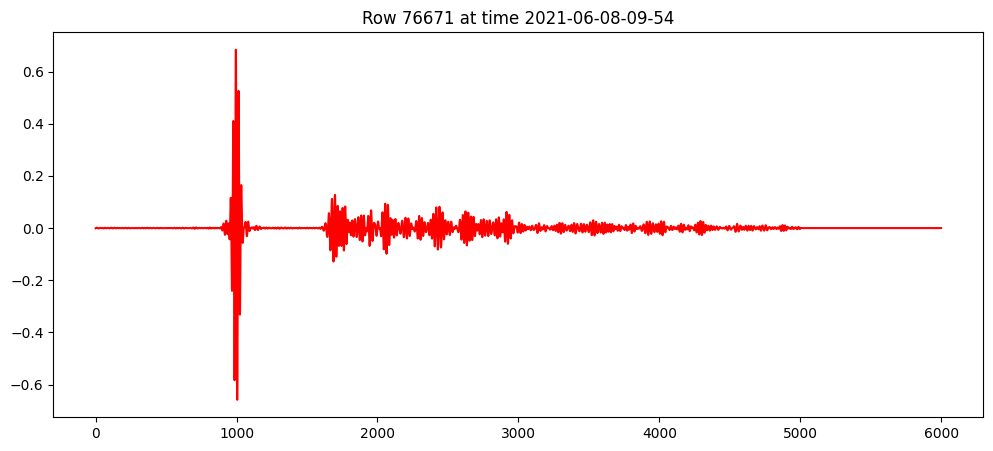

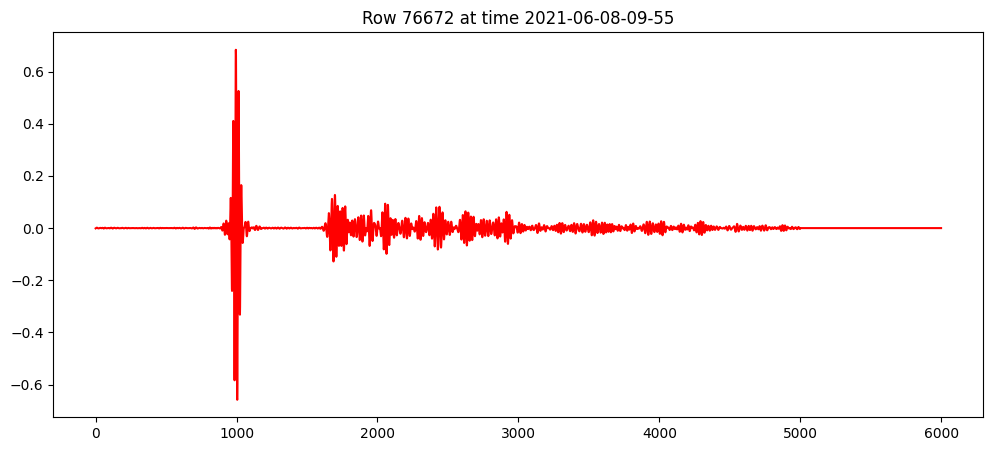

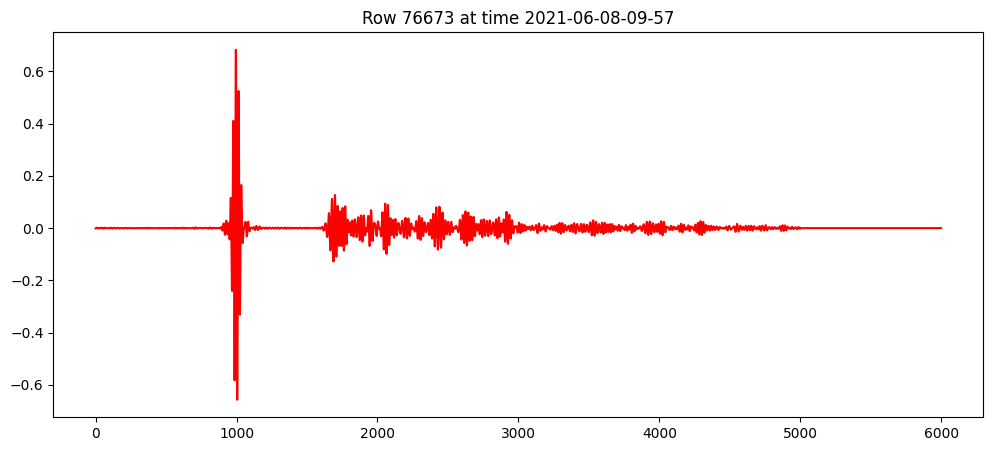

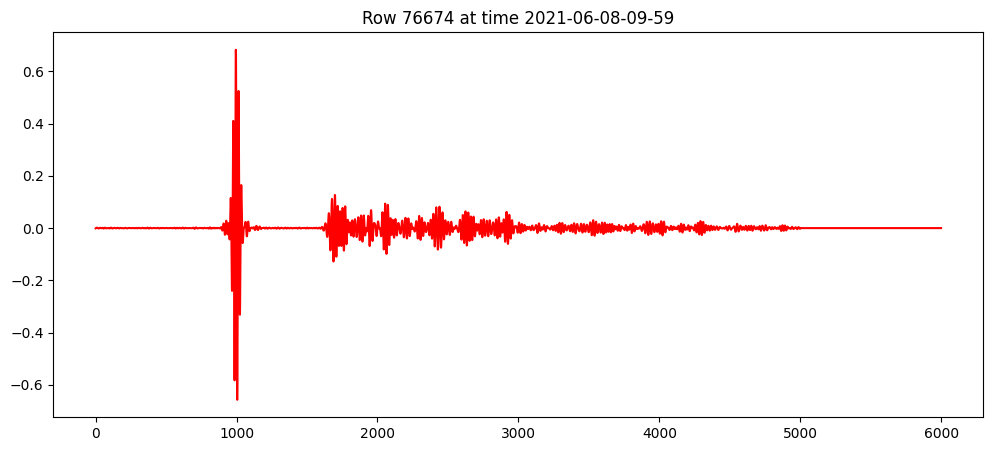

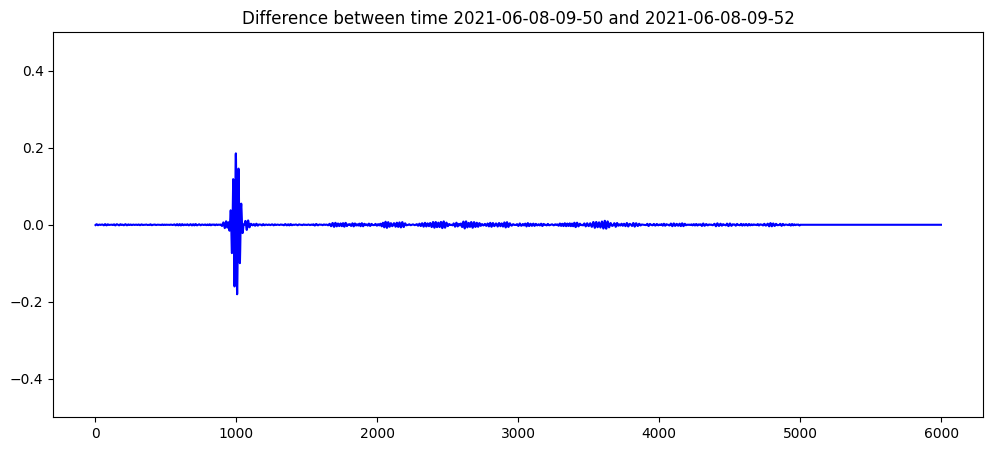

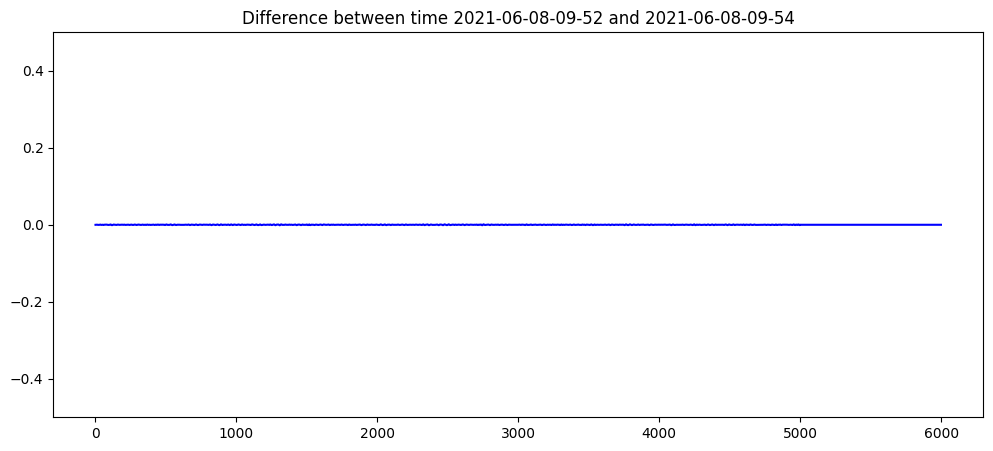

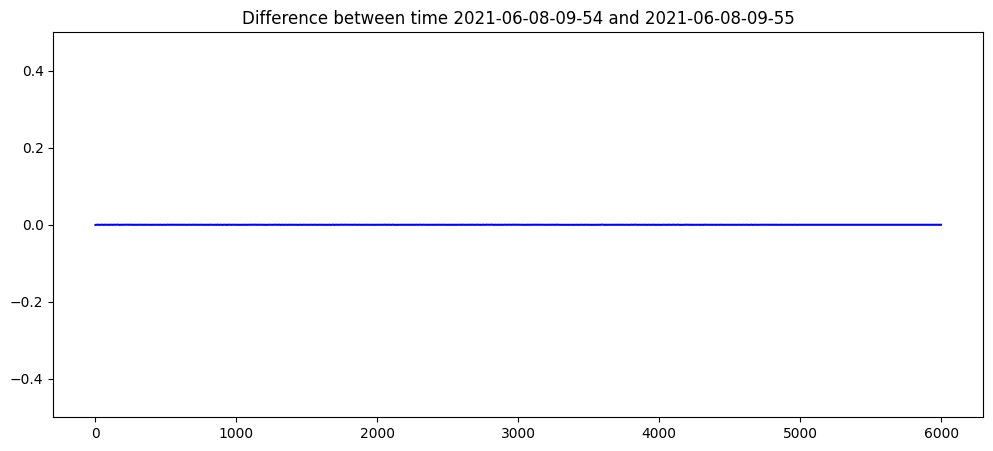

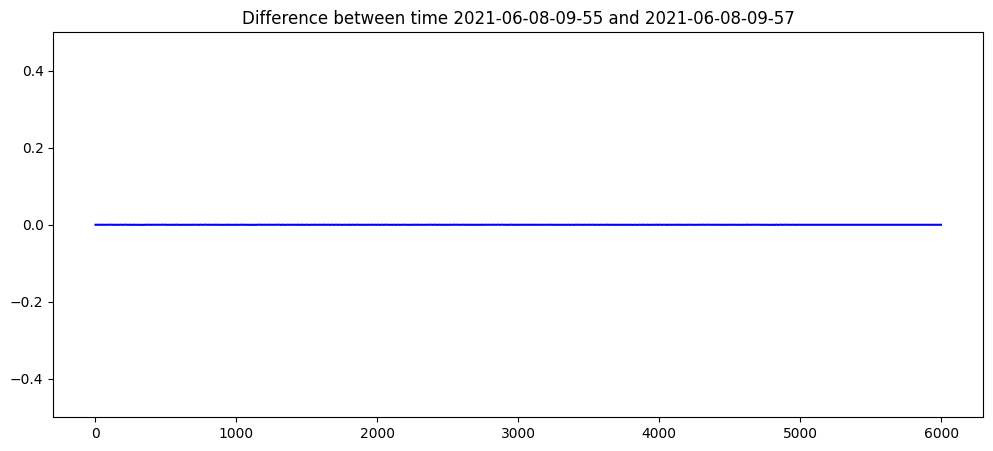

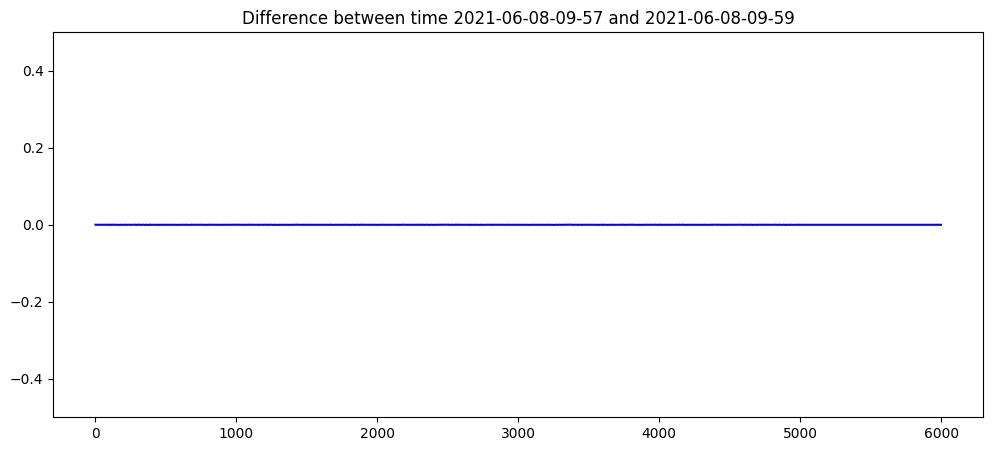

In [30]:
plot_and_subtract(df_real, s_dates_df, time_4)

## 5. Plotting Damaged Data no.4

### part depth 7mm around 0.6m, 0.4m

In [31]:
time_5 = [
    '2021-06-08-09-34',
    '2021-06-08-09-36',
    '2021-06-08-09-37',
    '2021-06-08-09-39',
    '2021-06-08-09-40'
]

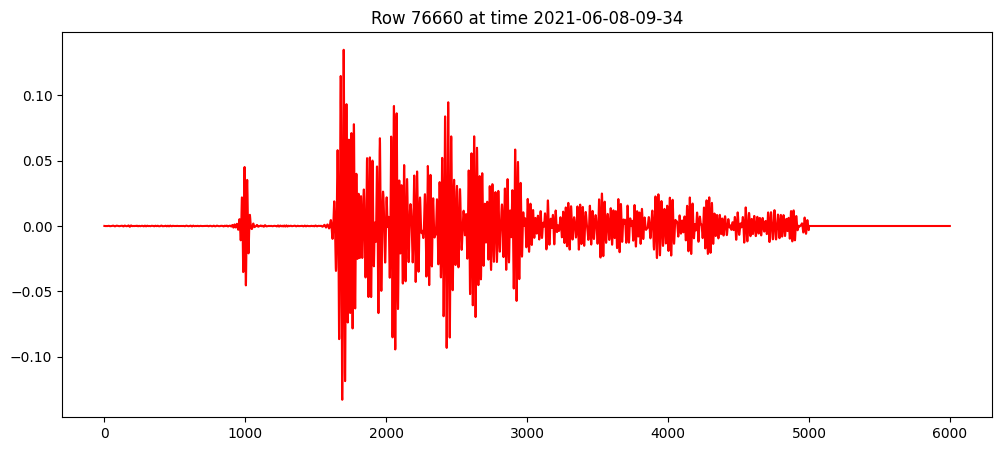

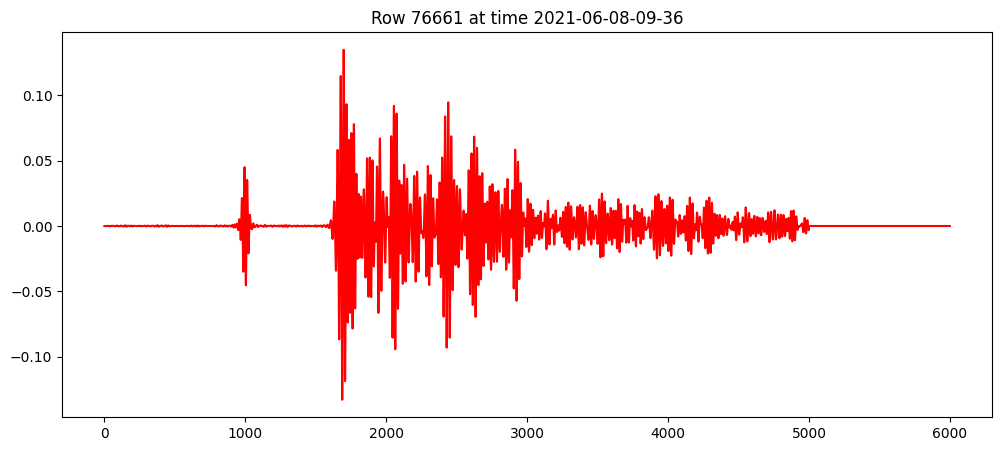

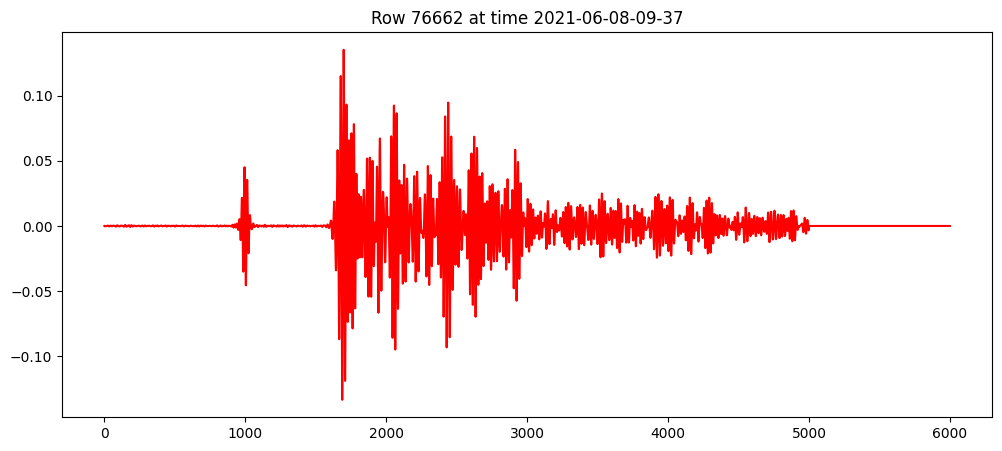

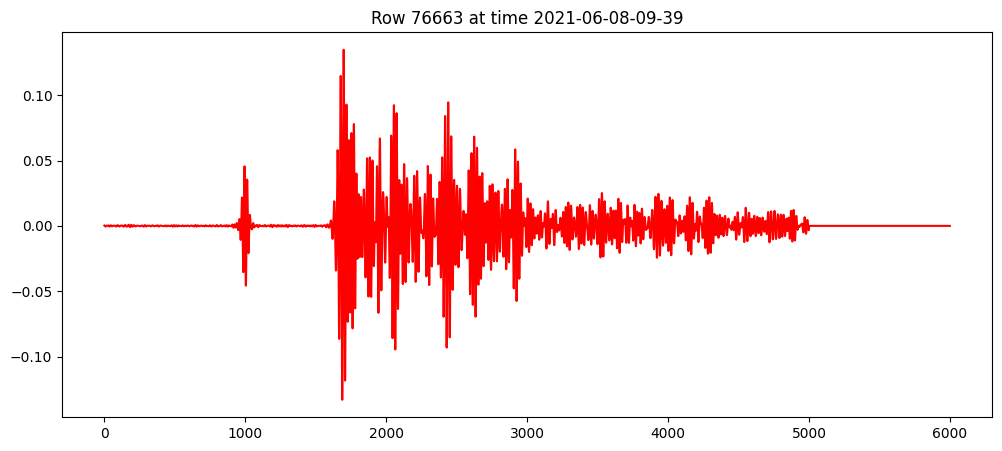

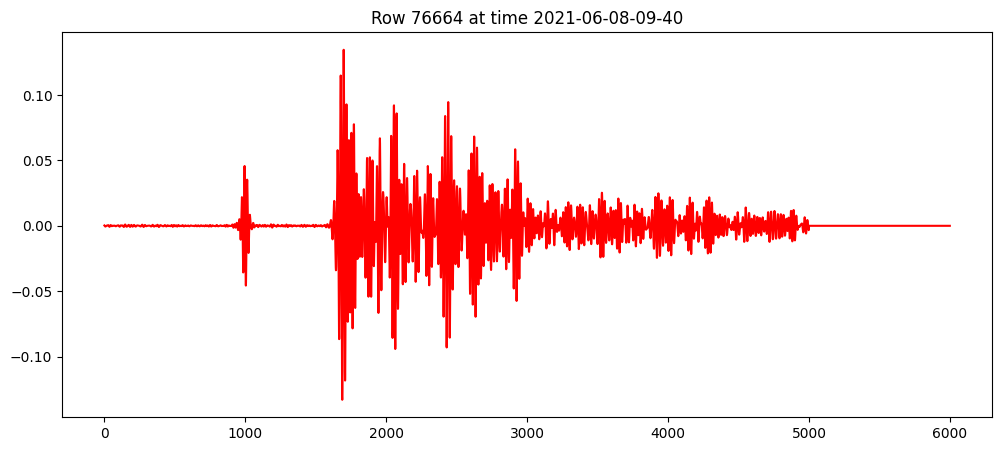

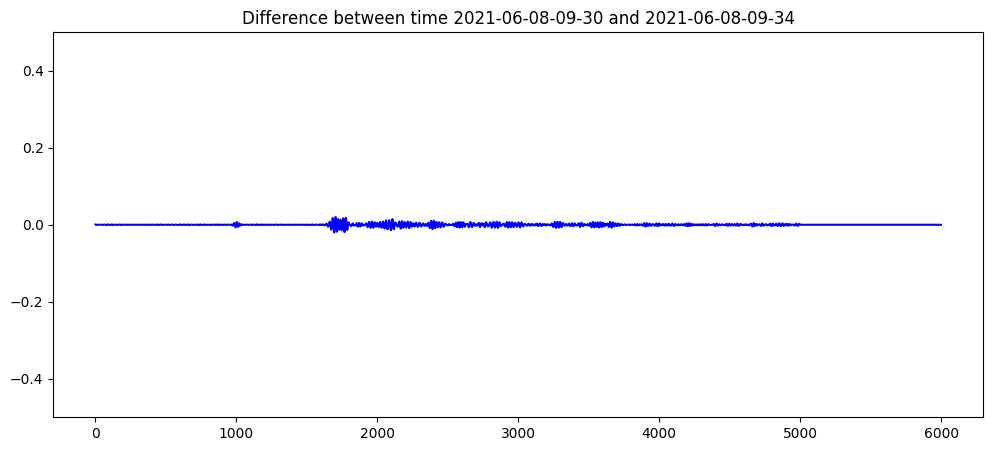

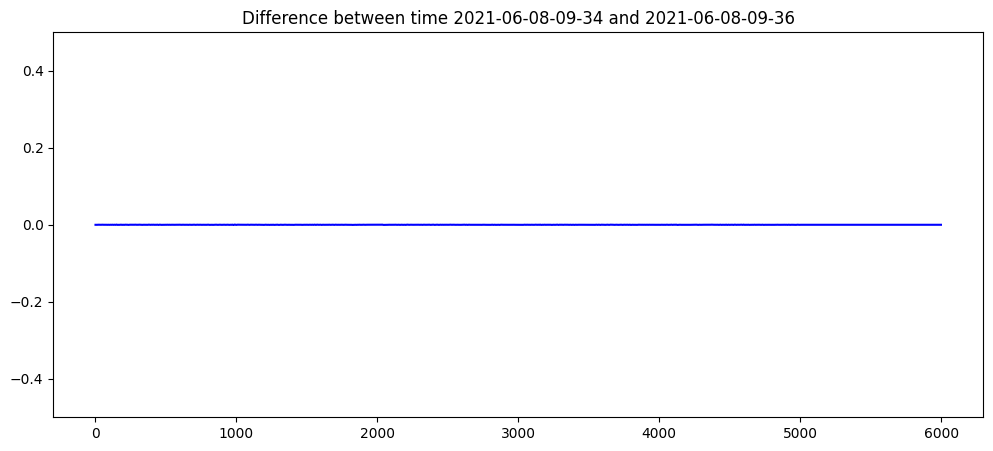

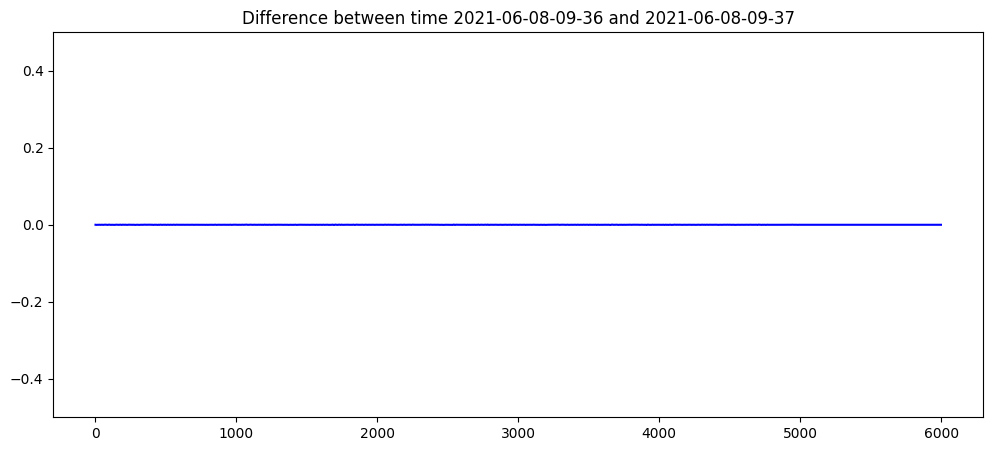

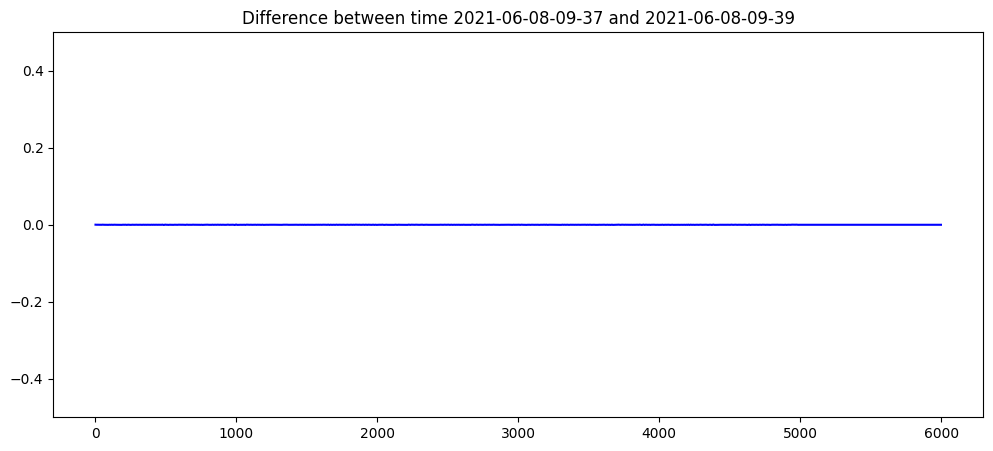

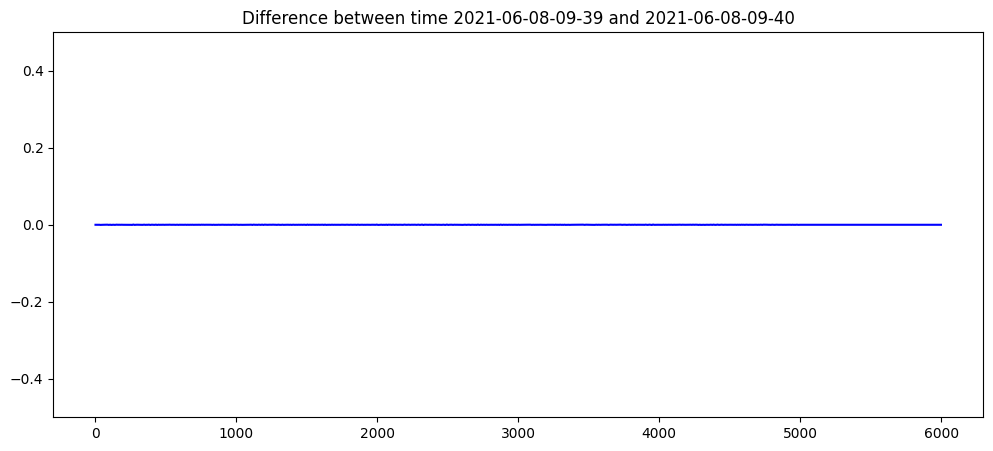

In [32]:
plot_and_subtract(df_real, s_dates_df, time_5)

## 6. Plotting Damaged Data no.5

### through hole 7mm around 0.6m, 0.4m

In [33]:
time_6 = [
    '2021-06-08-09-43',
    '2021-06-08-09-45',
    '2021-06-08-09-46',
    '2021-06-08-09-48',
    '2021-06-08-09-50'
]

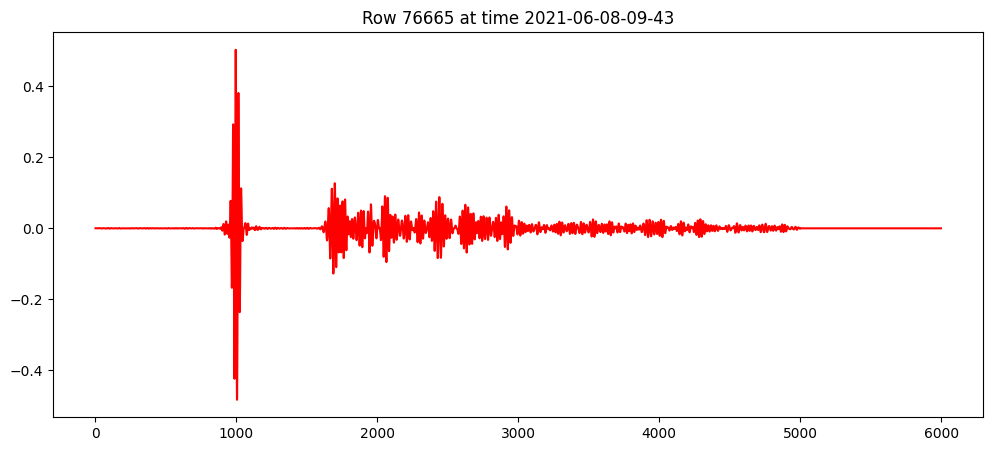

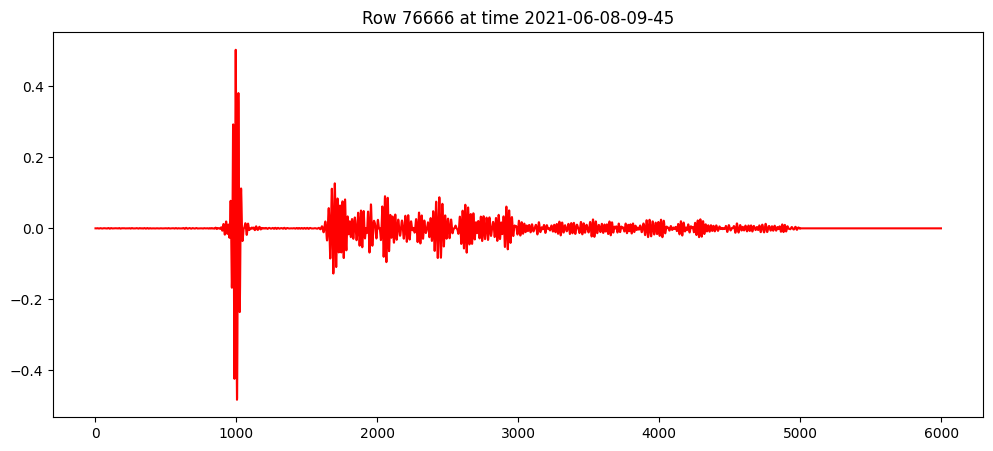

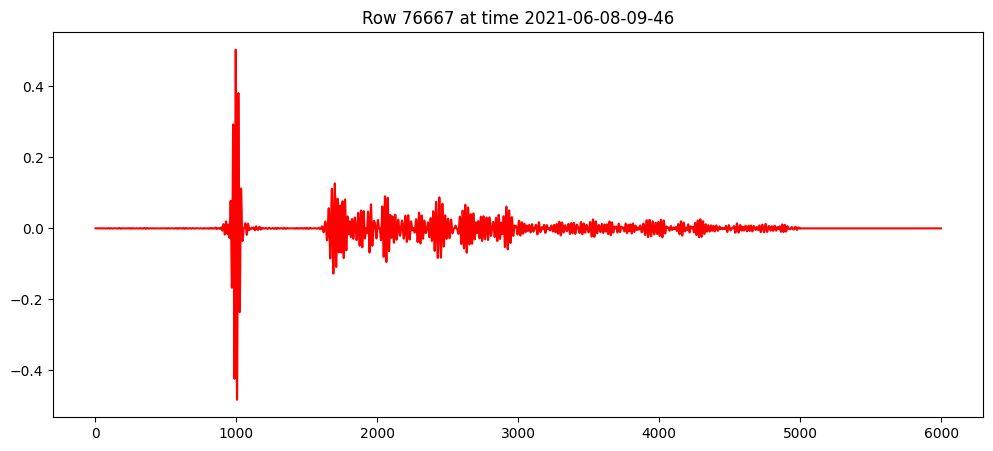

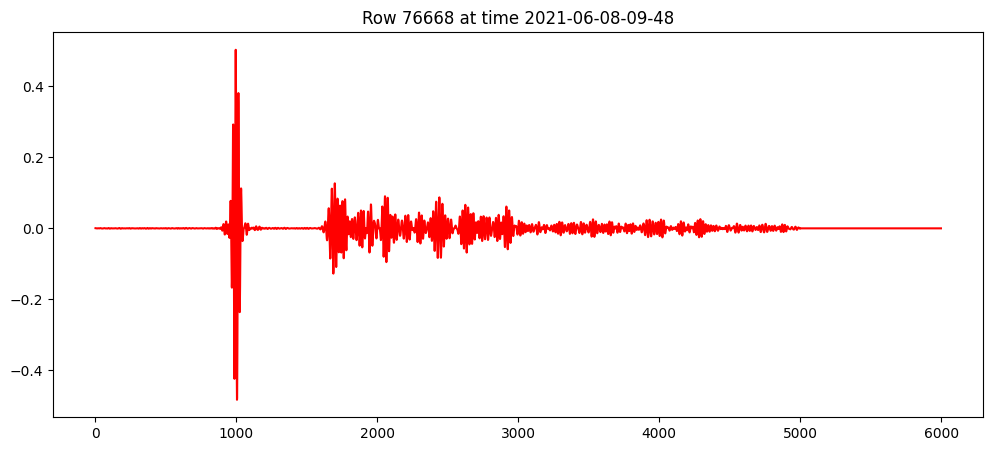

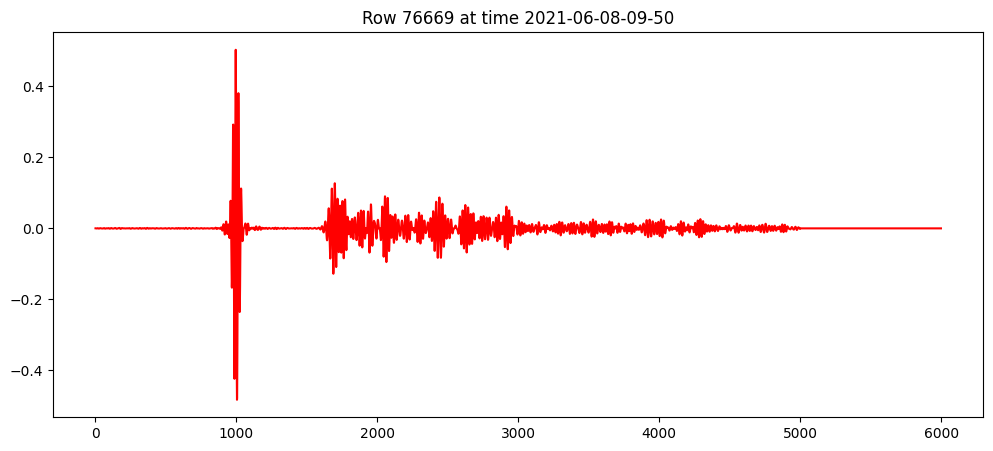

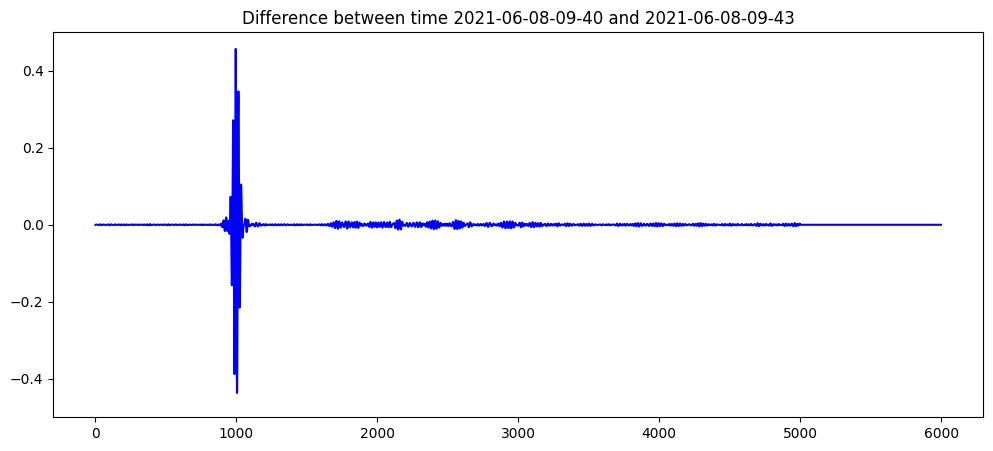

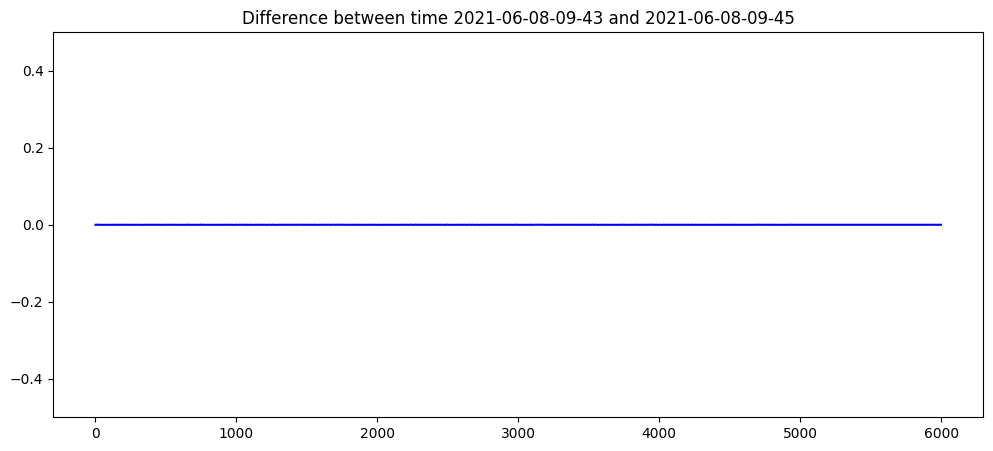

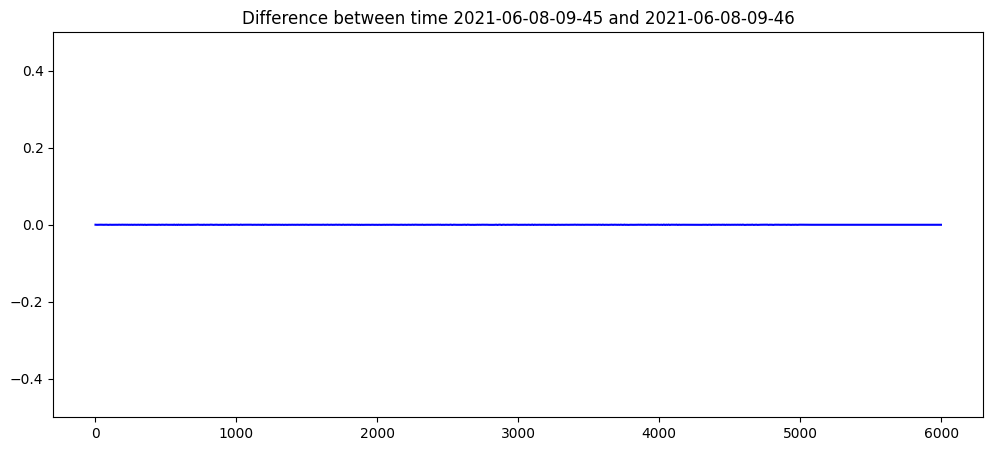

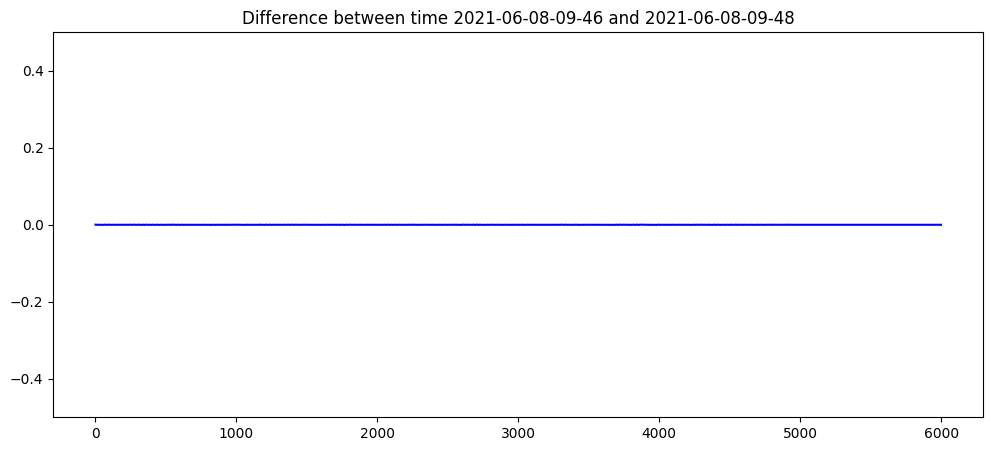

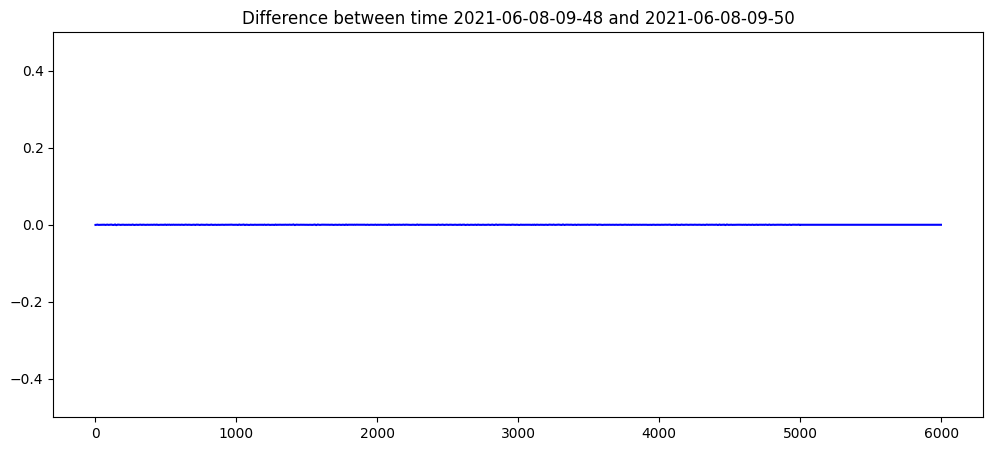

In [34]:
plot_and_subtract(df_real, s_dates_df, time_6)

## 7. Plotting Damaged Data no.6

### 6.5mm through hole in weld at 1.6m,0.6m

In [35]:
time_7 = [
    '2021-06-08-10-06',
    '2021-06-08-10-08',
    '2021-06-08-10-10',
    '2021-06-08-10-11',
    '2021-06-08-10-13'
]

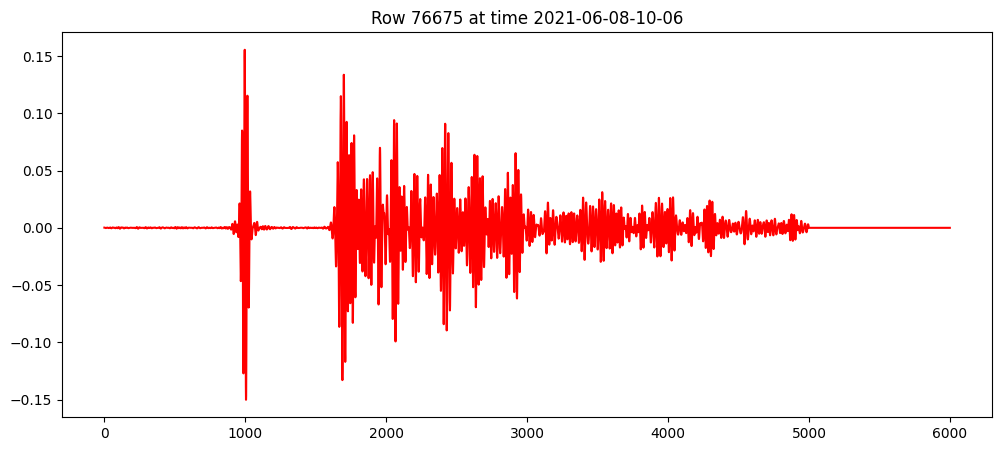

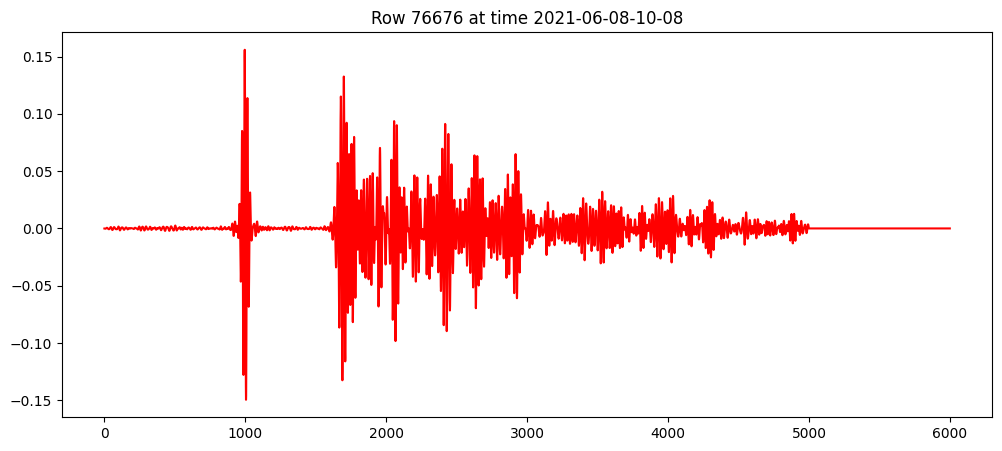

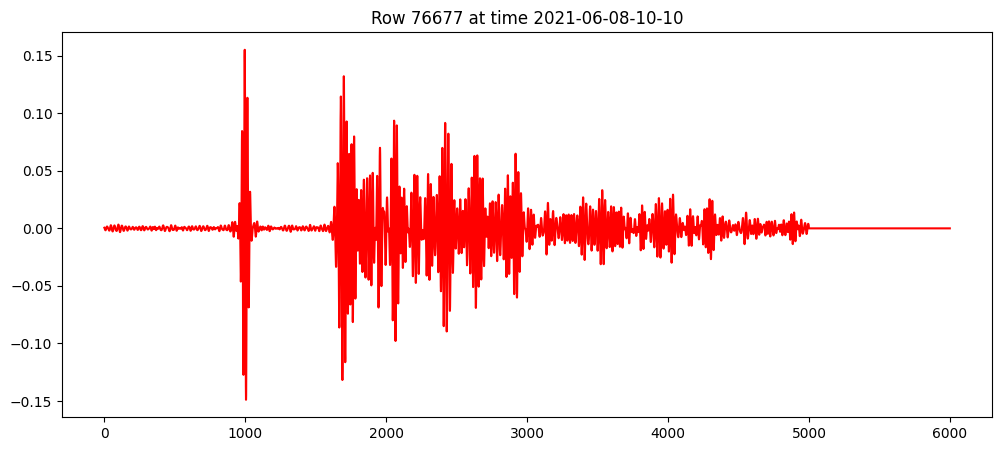

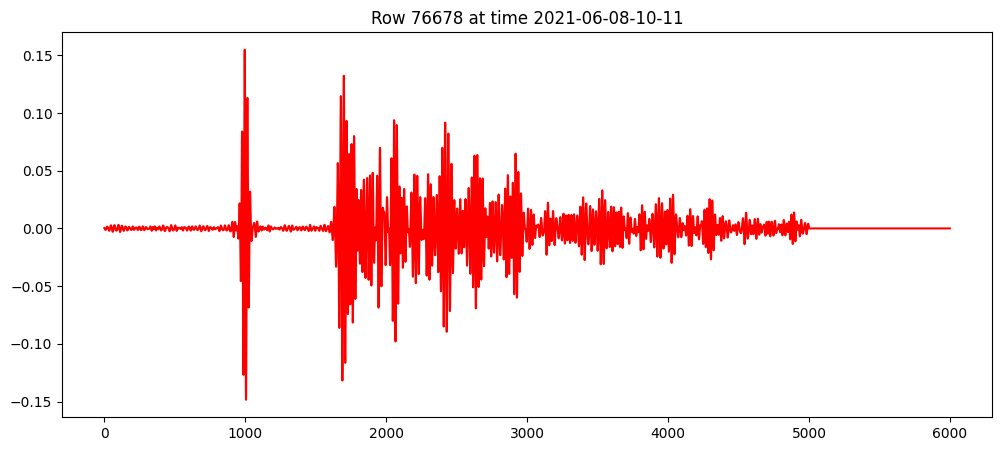

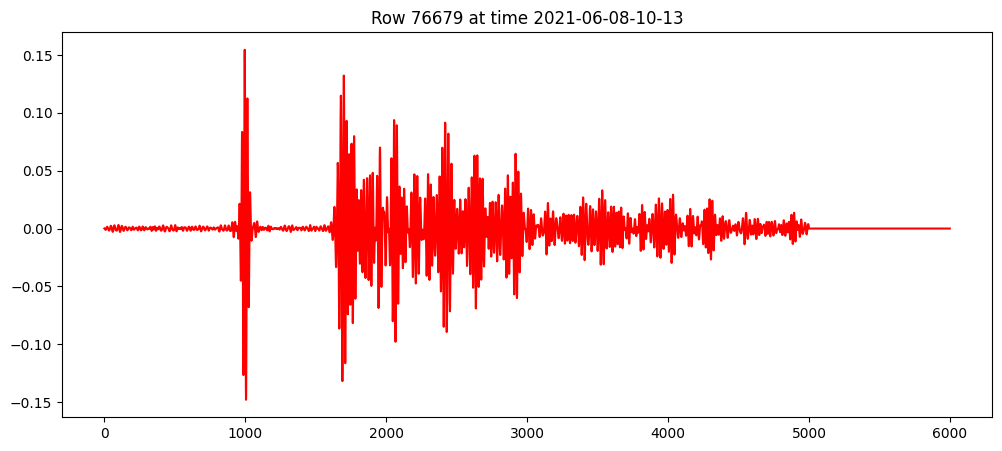

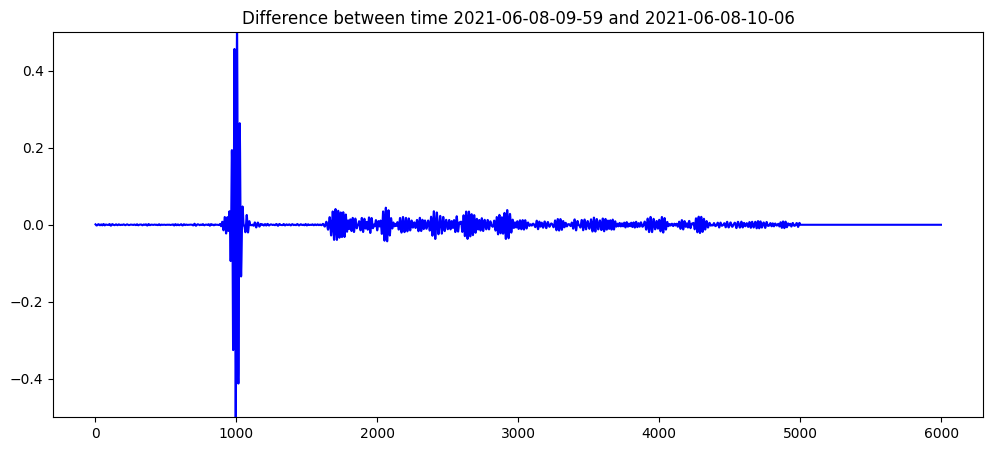

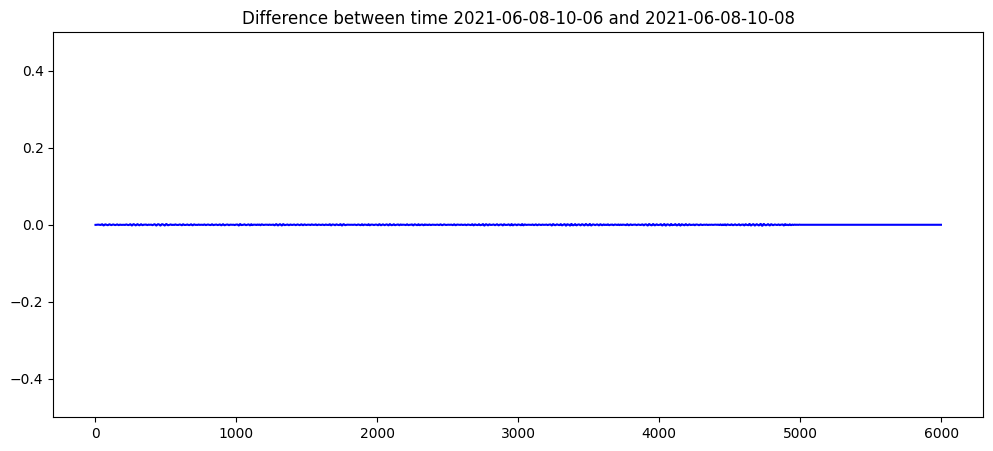

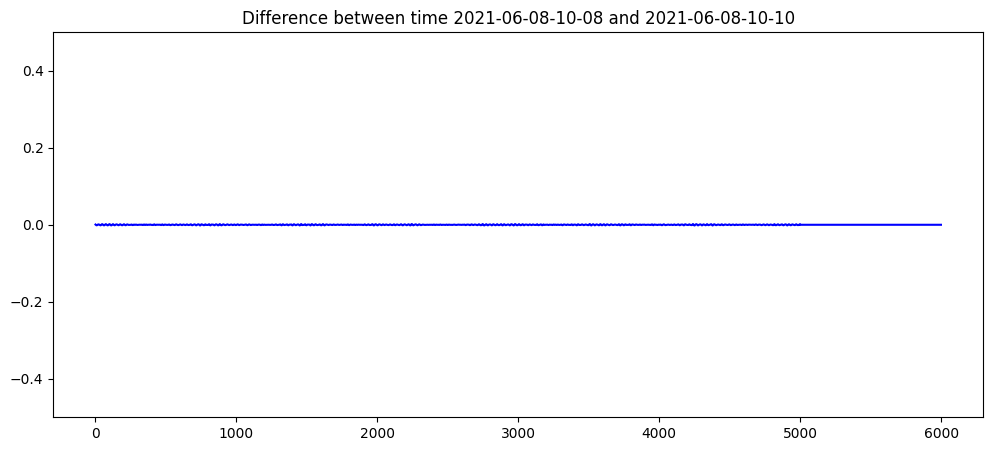

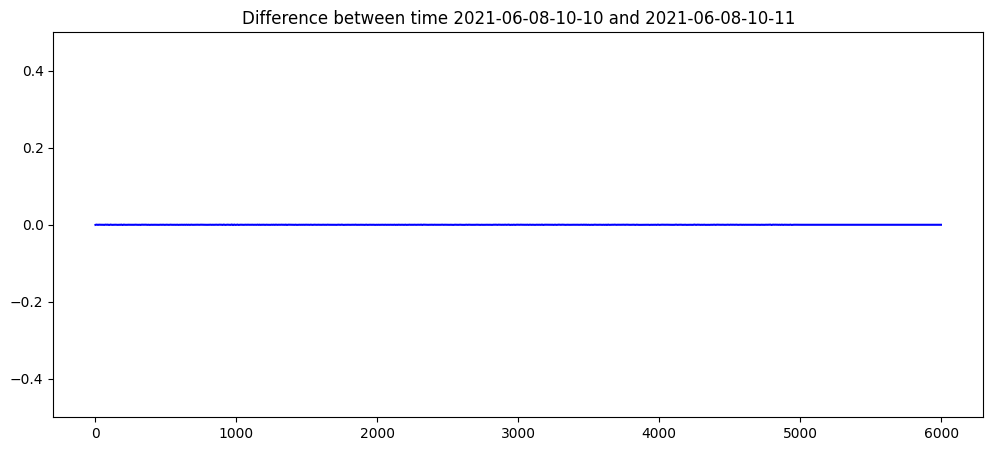

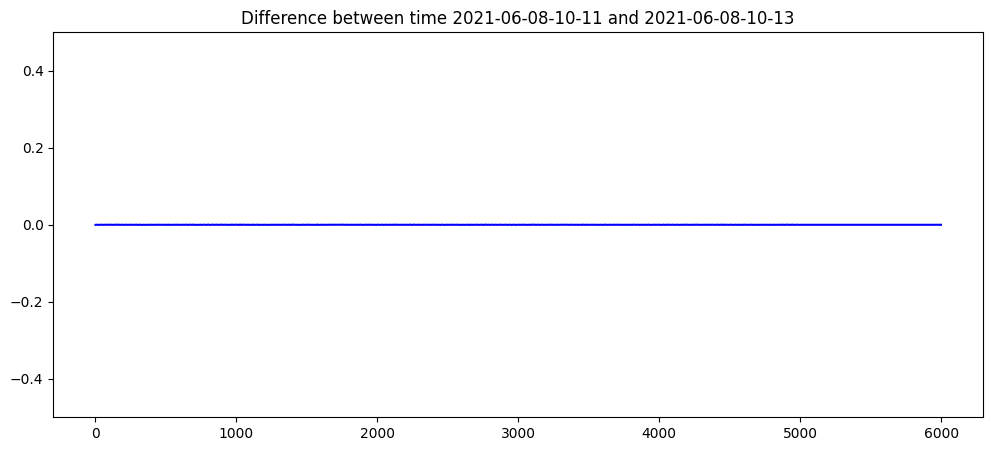

In [36]:
plot_and_subtract(df_real, s_dates_df, time_7)

## Plotting relationship


In [30]:
defect_time = ['2021-06-08-09-15',
               '2021-06-08-09-24',
               '2021-06-08-09-52',
               '2021-06-08-09-34',
               '2021-06-08-10-06']

In [31]:
def_id = get_index(s_dates_df, defect_time)

In [37]:
def_id

[76650, 76655, 76660, 76670, 76675]

In [44]:
n_rows = 76680
selected_indices = list(range(n_rows - 40, n_rows))

# Example defect indices
defect_indices = def_id  # Use your predefined list of defect points

# ==== Preload all rows in one go for speed ====
selected_df = df_real.loc[selected_indices].compute()
selected_array = selected_df.to_numpy()

# ==== Vectorized Subtraction ====
diffs = selected_array[1:] - selected_array[:-1]

# Compute magnitudes
magnitudes = np.linalg.norm(diffs, axis=1)

# ==== Time Intervals ====
time_intervals = []
for i in range(1, len(selected_indices)):
    delta_time = (s_dates[selected_indices[i]] - s_dates[selected_indices[i-1]]) * 24 * 60
    time_intervals.append(delta_time)

# ==== Colors ====
colors = ['red' if selected_indices[i-1] in defect_indices else 'blue' for i in range(1, len(selected_indices))]

